## Example python implementation for KNN purity score

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Functions import knn_purity, proliferation_purity
import scipy 
import scvelo as scv

In [2]:
gastrulation =sc.read_h5ad('/home/jovyan/GPLVM_Shaista/Benchmarking/gastrulation.h5ad')
forebrain= sc.read_h5ad('/home/jovyan/GPLVM_Shaista/Benchmarking/forebrain.h5ad')
bonemarrow= sc.read_h5ad('/home/jovyan/GPLVM_Shaista/Benchmarking/bonemarrow.h5ad')
# iPSC= sc.read_h5ad('/home/jovyan/GPLVM_Shaista/Benchmarking/iPSC.h5ad')
pancreas= sc.read_h5ad('/home/jovyan/GPLVM_Shaista/Benchmarking/pancreas.h5ad')
pbmc10k= sc.read_h5ad('/home/jovyan/GPLVM_Shaista/Benchmarking/pbmc10k.h5ad')
pbmc3k= sc.read_h5ad('/home/jovyan/GPLVM_Shaista/Benchmarking/pbmc3k.h5ad')

In [3]:
M_Cap=[]
for i in range(len(gastrulation.var.index)):
    M_Cap.append(gastrulation.var.index[i].upper())
gastrulation.var.index=M_Cap

M_Cap=[]
for i in range(len(pancreas.var.index)):
    M_Cap.append(pancreas.var.index[i].upper())
pancreas.var.index=M_Cap


In [4]:
forebrain.obs['celltype']=forebrain.obs['Clusters']
pancreas.obs['celltype']=pancreas.obs['clusters']
bonemarrow.obs['celltype']=bonemarrow.obs['clusters']
pancreas.obs['celltype']=pancreas.obs['clusters']
pbmc10k.obs['celltype']=pbmc10k.obs['predicted.celltype.l2']
pbmc3k.obs['celltype']=pbmc3k.obs['predicted.celltype.l2']
forebrain.obs['celltype'] = pd.Categorical(forebrain.obs.celltype)

In [5]:
datasets=[ pancreas, forebrain, bonemarrow, pbmc10k, pbmc3k]
for i in range(len(datasets)):
    knn_purity(datasets[i], "X_umap_pca", 'celltype')
    knn_purity(datasets[i], "X_umap_gplvm_random", 'celltype')
    knn_purity(datasets[i], "X_umap_gplvm_PC", 'celltype')


In [6]:
datasets.append(gastrulation)

In [7]:
# Save knn scores

knnpurity_data= pd.DataFrame(columns=['knn','condition', 'dataset'])
datasets=[ pancreas, forebrain, bonemarrow,pbmc10k, pbmc3k, gastrulation]
datasets_names=['pancreas', 'forebrain', 'bonemarrow', 'pbmc10k', 'pbmc3k', 'gastrulation']
conditions=['knn_purity_X_umap_pca','knn_purity_X_umap_gplvm_PC','knn_purity_X_umap_gplvm_random']
condition_names=['PCA', "gplvm_PCA", "gplvm_random"]
for i in range(len(datasets)):
    for j in range(len(conditions)):
        tempdf= pd.DataFrame(columns=['knn','condition', 'dataset'])
        tempdf['knn']= datasets[i].obs[conditions[j]]
        tempdf['condition']= condition_names[j]
        tempdf['dataset']= datasets_names[i]
        knnpurity_data = pd.concat([knnpurity_data,tempdf])  

In [10]:
knnpurity_data.to_csv("Knn_purity.csv")

In [66]:
# # save everything once so don't have to rerun every time
# gastrulation.write_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/gastrulation.h5ad')
# forebrain.write_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/forebrain.h5ad')
# bonemarrow.write_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/bonemarrow.h5ad')
# iPSC.write_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/iPSC.h5ad')
# pancreas.write_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/pancreas.h5ad')
# pbmc10k.write_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/pbmc10k.h5ad')
# pbmc3k.write_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/pbmc3k.h5ad')

In [8]:
pbmc10k2= sc.read_h5ad('/home/jovyan/mount/gdrive/PBMC/pbmc10k/pbmc10k.h5ad')
sc.pp.normalize_total(pbmc10k2, target_sum=1e4)
sc.pp.log1p(pbmc10k2)
sc.pp.highly_variable_genes(pbmc10k2)
pbmc10k2.obs['celltype']=pbmc10k2.obs['predicted.celltype.l2']

pbmc10k2.obsm['X_BGPLVM_latent']=pbmc10k.obsm['X_BGPLVM_latent']
pbmc10k2.obsm['X_pca']=pbmc10k.obsm['X_pca']
pbmc10k2.obsm['X_umap_gplvm_PC']=pbmc10k.obsm['X_umap_gplvm_PC']
pbmc10k2.obsm['X_umap_gplvm_random']=pbmc10k.obsm['X_umap_gplvm_random']
pbmc10k2.obsm['X_umap_pca']=pbmc10k.obsm['X_umap_pca']

pbmc10k2.obs['knn_purity_X_umap_pca']=pbmc10k.obs['knn_purity_X_umap_pca'].copy()
pbmc10k2.obs['knn_purity_X_umap_gplvm_PC']=pbmc10k.obs['knn_purity_X_umap_gplvm_PC'].copy()
pbmc10k2.obs['knn_purity_X_umap_gplvm_random']=pbmc10k.obs['knn_purity_X_umap_gplvm_random'].copy()

In [40]:
pbmc3k

AnnData object with n_obs × n_vars = 3012 × 4134
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'cellcycle_pseudotime', 'clusters_gplvm_PcaInit', 'clusters_PC', 'clusters_gplvm_randomInit', 'celltype', 'knn_purity_X_umap_pca', 'knn_purity_X_umap_gplvm_random', 'knn_purity_X_umap_gplvm_PC'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'PCA', 'gplvm_PCA', 'hvg', 'knnpurity', 'leiden', 'likelihood_state_dict', 'model_state_dict', 'pca', 'umap'
    obsm: 'X_BGPLVM_latent', 'X_pca', 'X_ref.spca', 'X_ref.umap', 'X_umap', 'X_umap_gplvm_PC', 'X_umap_gplvm_random', 'X_umap_pca'
    varm: 'PCs'
    obsp: 'PCA_connectivities', 'PCA_distances', 'gplvm_PCA_connectivities', 'gplvm_PCA_distances', 'knnpurity_connectivities', 'knnpurity_distances'

In [37]:
gastrulation2= scv.datasets.forebrain()
sc.pp.normalize_total(gastrulation2, target_sum=1e4)




Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [38]:
sc.pp.normalize_total(gastrulation2, target_sum=1e4)

sc.pp.log1p(gastrulation2)

In [39]:
sc.pp.log1p(gastrulation2)

In [9]:
gastrulation2= scv.datasets.gastrulation()
sc.pp.normalize_total(gastrulation2, target_sum=1e4)
sc.pp.log1p(gastrulation2)
sc.pp.highly_variable_genes(gastrulation2)

gastrulation2.obsm['X_BGPLVM_latent']=gastrulation.obsm['X_BGPLVM_latent']
gastrulation2.obsm['X_pca']=gastrulation.obsm['X_pca']
gastrulation2.obsm['X_umap_gplvm_PC']=gastrulation.obsm['X_umap_gplvm_PC']
gastrulation2.obsm['X_umap_gplvm_random']=gastrulation.obsm['X_umap_gplvm_random']
gastrulation2.obsm['X_umap_pca']=gastrulation.obsm['X_umap_pca']

gastrulation2.obs['knn_purity_X_umap_pca']=gastrulation.obs['knn_purity_X_umap_pca'].copy()
gastrulation2.obs['knn_purity_X_umap_gplvm_PC']=gastrulation.obs['knn_purity_X_umap_gplvm_PC'].copy()
gastrulation2.obs['knn_purity_X_umap_gplvm_random']=gastrulation.obs['knn_purity_X_umap_gplvm_random'].copy()

M_Cap=[]
for i in range(len(gastrulation2.var.index)):
    M_Cap.append(gastrulation2.var.index[i].upper())
gastrulation2.var.index=M_Cap

In [10]:
gastrulation2

AnnData object with n_obs × n_vars = 89267 × 53801
    obs: 'barcode', 'sample', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajectoryName', 'endo_trajectoryDPT', 'endo_gutX', 'endo_gutY', 'endo_gutDPT', 'endo_gutCluster', 'cell_velocyto_loom', 'knn_purity_X_umap_pca', 'knn_purity_X_umap_gplvm_PC', 'knn_purity_X_umap_gplvm_random'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'X_pca', 'X_umap', 'X_BGPLVM_latent', 'X_umap_gplvm_PC', 'X_umap_gplvm_random', 'X_umap_pca'
    layers: 'spliced', 'unspliced'

In [11]:
gastrulation2.obs['cellcycle_pseudotime']=gastrulation.obs['cellcycle_pseudotime'].copy()

pbmc10k2.obs['cellcycle_pseudotime']=pbmc10k.obs['cellcycle_pseudotime'].copy()



In [75]:
# pbmc3k2= sc.read_h5ad('/home/jupyter/mount/gdrive/PBMC/pbmc3k/pbmc3k.h5ad')
# sc.pp.normalize_total(pbmc3k2, target_sum=1e4)
# sc.pp.log1p(pbmc3k2)
# sc.pp.highly_variable_genes(pbmc3k2)
# pbmc3k2.obs['celltype']=pbmc3k2.obs['predicted.celltype.l2']

# pbmc3k2.obsm['X_BGPLVM_latent']=pbmc3k.obsm['X_BGPLVM_latent']
# pbmc3k2.obsm['X_pca']=pbmc3k.obsm['X_pca']
# pbmc3k2.obsm['X_umap_gplvm_PC']=pbmc3k.obsm['X_umap_gplvm_PC']
# pbmc3k2.obsm['X_umap_gplvm_random']=pbmc3k.obsm['X_umap_gplvm_random']
# pbmc3k2.obsm['X_umap_pca']=pbmc3k.obsm['X_umap_pca']

CellCycle Purity- PLk1 in forebrain and pancreas--  Mphase

In [14]:
datasets=[forebrain,pancreas, pbmc10k2]
for i in range(len(datasets)):
    proliferation_purity(datasets[i], "X_umap_pca", 'PLK1')
    proliferation_purity(datasets[i], "X_umap_gplvm_PC", 'PLK1')
    proliferation_purity(datasets[i], "X_umap_gplvm_random", 'PLK1')



In [23]:
proliferation_purity(gastrulation2, "X_umap_pca", 'PLK1')
proliferation_purity(gastrulation2, "X_umap_gplvm_PC", 'PLK1')
proliferation_purity(gastrulation2, "X_umap_gplvm_random", 'PLK1')
adata_gas= gastrulation2[gastrulation2.obs["PLK1"]=='high'].copy()
Gastrulation_PLK1= gastrulation2.obs

In [52]:
Gastrulation_PLK1.to_csv('gastrulation_plk1.csv')

In [53]:
subset=[]
for i in range(len(datasets)):
    adata = datasets[i].copy()
    subset.append(adata[adata.obs['PLK1']=='high'])

In [54]:
subset.append(adata_gas)

In [57]:
# sc.pl.violin(forebrain, 'proliferation_purity_X_umap_pca', groupby='celltype')
# sc.pl.violin(forebrain, 'proliferation_purity_X_umap_gplvm_PC', groupby='celltype')
# sc.pl.violin(forebrain, 'proliferation_purity_X_umap_gplvm_random', groupby='celltype')

In [58]:
# sc.pl.violin(pancreas, 'proliferation_purity_X_umap_pca', groupby='celltype')
# sc.pl.violin(pancreas, 'proliferation_purity_X_umap_gplvm_PC', groupby='celltype')
# sc.pl.violin(pancreas, 'proliferation_purity_X_umap_gplvm_random', groupby='celltype')

In [55]:
cc_purity_data_plk1= pd.DataFrame(columns=['score','condition', 'dataset', "Gene"])
datasets=subset
datasets_names=[ 'forebrain', 'pancreas', 'pbmc10k', 'gastrulation']
conditions=['proliferation_purity_X_umap_pca','proliferation_purity_X_umap_gplvm_PC','proliferation_purity_X_umap_gplvm_random']
condition_names=['PCA', "gplvm_PCA", "gplvm_random"]
for i in range(len(datasets)):
    for j in range(len(conditions)):
        tempdf= pd.DataFrame(columns=['score','condition', 'dataset'])
        tempdf['score']= datasets[i].obs[conditions[j]]
        tempdf['condition']= condition_names[j]
        tempdf['dataset']= datasets_names[i]
        tempdf['Gene']= "PLK1"
        cc_purity_data_plk1 = pd.concat([cc_purity_data_plk1,tempdf])  


In [56]:
 cc_purity_data_plk1.to_csv("plk1.csv")

In [23]:
def TTest_CCN(adata, name_dataset):
    
    '''
    calculates the t-test scores to get an idea of the agreement between clusters based on ground truth (celltype in obs) 
    and the clusters obtained via PCA and laent variable UMAPs..(??)
    '''
    input=[['randomVsPCInit'],['randomVsPCA'],['PCAvsPCAInit']]
    input[0].append((scipy.stats.ttest_ind(adata.obs['proliferation_purity_X_umap_gplvm_PC'], adata.obs['proliferation_purity_X_umap_gplvm_random'])[1]))
    input[1].append(scipy.stats.ttest_ind(adata.obs['proliferation_purity_X_umap_pca'], adata.obs['proliferation_purity_X_umap_gplvm_random'])[1])
    input[2].append(scipy.stats.ttest_ind(adata.obs['proliferation_purity_X_umap_pca'], adata.obs['proliferation_purity_X_umap_gplvm_PC'])[1])
    S=pd.DataFrame(input, columns=['condition', 'score'] )
    S['dataset']= name_dataset
                                                   
    return S



In [24]:
ds =subset
names= ['forebrain', 'pancreas','pbmc10k', 'gastrulation']
TT_DF= pd.DataFrame(columns=['condition', 'score', 'dataset'] )
for i in range(len(ds)):
    adata = ds[i]
    name= names[i]
    TTestScores = TTest_CCN(adata, name)
    TT_DF= pd.concat([TT_DF, TTestScores]) 

In [25]:
TT_DF

,condition,score,dataset
0,randomVsPCInit,8.493266e-01,forebrain
1,randomVsPCA,4.908220e-02,forebrain
2,PCAvsPCAInit,3.125805e-02,forebrain
0,randomVsPCInit,6.960582e-01,pancreas
1,randomVsPCA,1.313206e-01,pancreas
2,PCAvsPCAInit,5.794378e-02,pancreas
0,randomVsPCInit,3.707309e-02,pbmc10k
1,randomVsPCA,2.293035e-02,pbmc10k
2,PCAvsPCAInit,7.309644e-01,pbmc10k
0,randomVsPCInit,2.761960e-20,gastrulation


In [26]:
len(subset)

4

In [53]:
# sc.pp.neighbors(adata, n_neighbors=100, key_added='prolif_purity', use_rep=X_dim_red)
# bin_knn_mat=adata.obsp['prolif_purity_connectivities'].copy()
# bin_knn_mat[bin_knn_mat.nonzero()] = 1 
# bin_knn_mat = bin_knn_mat.toarray()
# def expression(x):
#     if x <.1:
#         return "low"
#     if (x >= .1) and (x< 1.5):
#         return "medium"
#     if x >=1.5:
#         return "high"
#     return "Success"

# for col in df.columns:
#     df[col] = df[col].apply(lambda x: expression(x))
# df = adata[:, gene_list].to_df()
# proliferation_status=df[gene_name]
# proliferation_status=proliferation_status.to_numpy()
# #proliferation_status

# adtaa.obs['profliferation_purity_' + X_dim_red] = np.nan

# for i in range(bin_knn_mat.shape[0]):
#         nn_labels = proliferation_status[bin_knn_mat[i,:].flatten()==1]
#         knn_purity = sum(nn_labels == proliferation_status[i])/len(nn_labels)
#         adata.obs.loc[adata.obs_names[i], 'proliferation_purity_' + X_dim_red] = knn_purity




In [72]:
# cc_purity_data_plk1.to_csv('cc_purity_data_plk1.csv')
# TT_DF.to_csv('cc_purity_TTest_plk1.csv')

CENPF- M Phase

... storing 'CENPF' as categorical


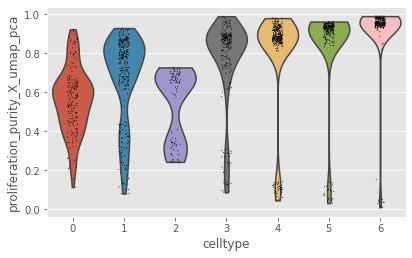

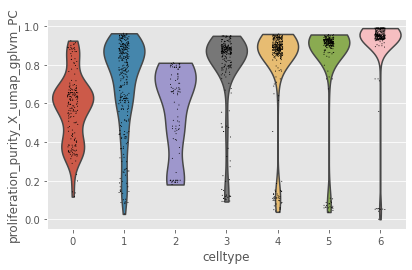

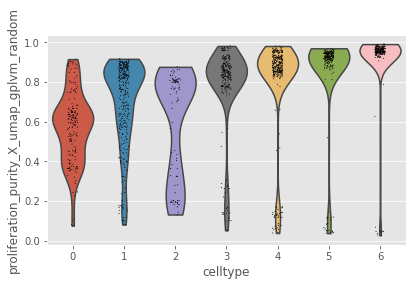

In [12]:
datasets2=[forebrain,  pancreas, pbmc10k]
for i in range(len(datasets2)):
    proliferation_purity(datasets2[i], "X_umap_pca", 'CENPF')
    proliferation_purity(datasets2[i], "X_umap_gplvm_PC", 'CENPF')
    proliferation_purity(datasets2[i], "X_umap_gplvm_random", 'CENPF')



forebrain.obs['celltype'] = pd.Categorical(forebrain.obs.celltype)
(forebrain.obs.dtypes)

sc.pl.violin(forebrain, 'proliferation_purity_X_umap_pca', groupby='celltype')
sc.pl.violin(forebrain, 'proliferation_purity_X_umap_gplvm_PC', groupby='celltype')
sc.pl.violin(forebrain, 'proliferation_purity_X_umap_gplvm_random', groupby='celltype')

In [13]:
proliferation_purity(gastrulation2, "X_umap_pca", 'CENPF')
proliferation_purity(gastrulation2, "X_umap_gplvm_PC", 'CENPF')
proliferation_purity(gastrulation2, "X_umap_gplvm_random", 'CENPF')
adata_gas= gastrulation2[gastrulation2.obs["CENPF"]=='high'].copy()
Gastrulation_CENPF= gastrulation2.obs

In [32]:
# sc.pl.violin(pbmc10k2, 'proliferation_purity_X_umap_pca', groupby='celltype')
# sc.pl.violin(pbmc10k2, 'proliferation_purity_X_umap_gplvm_PC', groupby='celltype')
# sc.pl.violin(pbmc10k2, 'proliferation_purity_X_umap_gplvm_random', groupby='celltype')

In [33]:
# sc.pl.violin(pancreas, 'proliferation_purity_X_umap_pca', groupby='celltype')
# sc.pl.violin(pancreas, 'proliferation_purity_X_umap_gplvm_PC', groupby='celltype')
# sc.pl.violin(pancreas, 'proliferation_purity_X_umap_gplvm_random', groupby='celltype')

In [14]:
subset2=[]
for i in range(len(datasets2)):
    adata = datasets2[i].copy()
    subset2.append(adata[adata.obs['CENPF']=='high'])

In [15]:
subset2.append(adata_gas)

In [16]:
subset2

[View of AnnData object with n_obs × n_vars = 307 × 2454
     obs: 'Clusters', 'cellcycle_pseudotime', 'clusters_gplvm_PcaInit', 'clusters_PC', 'clusters_gplvm_randomInit', 'celltype', 'knn_purity_X_umap_pca', 'knn_purity_X_umap_gplvm_random', 'knn_purity_X_umap_gplvm_PC', 'CENPF', 'proliferation_purity_X_umap_pca', 'proliferation_purity_X_umap_gplvm_PC', 'proliferation_purity_X_umap_gplvm_random'
     var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'PCA', 'gplvm_PCA', 'hvg', 'knnpurity', 'leiden', 'likelihood_state_dict', 'model_state_dict', 'pca', 'umap', 'prolif_purity', 'celltype_colors'
     obsm: 'X_BGPLVM_latent', 'X_pca', 'X_umap', 'X_umap_gplvm_PC', 'X_umap_gplvm_random', 'X_umap_pca'
     varm: 'PCs'
     layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
     obsp: 'PCA_connectivities', 'PCA_distances', 'gplvm_PCA_connectivities', 'gplvm_PCA_distances', 'knnpurity_connectivities', 'knnpurity

In [17]:
pancreas

AnnData object with n_obs × n_vars = 3696 × 1939
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'cellcycle_pseudotime', 'clusters_gplvm_PcaInit', 'clusters_PC', 'clusters_gplvm_randomInit', 'celltype', 'knn_purity_X_umap_pca', 'knn_purity_X_umap_gplvm_random', 'knn_purity_X_umap_gplvm_PC', 'CENPF', 'proliferation_purity_X_umap_pca', 'proliferation_purity_X_umap_gplvm_PC', 'proliferation_purity_X_umap_gplvm_random'
    var: 'highly_variable_genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'PCA', 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'gplvm_PCA', 'hvg', 'knnpurity', 'leiden', 'likelihood_state_dict', 'model_state_dict', 'neighbors', 'pca', 'umap', 'prolif_purity'
    obsm: 'X_BGPLVM_latent', 'X_pca', 'X_umap', 'X_umap_gplvm_PC', 'X_umap_gplvm_random', 'X_umap_pca'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'
    obsp: 'PCA_connectivities', 'PCA_distances', 'connectivities', 'distances', 'gplvm_PCA_connectivities', 

In [37]:
# sc.pl.violin(subset2[2], 'proliferation_purity_X_umap_pca', groupby='celltype')
# sc.pl.violin(subset2[2], 'proliferation_purity_X_umap_gplvm_PC', groupby='celltype')
# sc.pl.violin(subset2[2], 'proliferation_purity_X_umap_gplvm_random', groupby='celltype')

In [65]:
cc_purity_data_cenpf= pd.DataFrame(columns=['score','condition', 'dataset', "Gene"])
datasets= subset2
datasets_names=['forebrain',  'pancreas', 'pbmc10k', 'gastrulation']
conditions=['proliferation_purity_X_umap_pca','proliferation_purity_X_umap_gplvm_PC','proliferation_purity_X_umap_gplvm_random']
condition_names=['PCA', "gplvm_PCA", "gplvm_random"]
for i in range(len(datasets)):
    for j in range(len(conditions)):
        tempdf= pd.DataFrame(columns=['score','condition', 'dataset'])
        tempdf['score']= datasets[i].obs[conditions[j]]
        tempdf['condition']= condition_names[j]
        tempdf['dataset']= datasets_names[i]
        tempdf['Gene']= "CENPF"
        cc_purity_data_cenpf= pd.concat([cc_purity_data_cenpf,tempdf])  



In [71]:
len(subset2)

4

In [66]:
sum(cc_purity_data_cenpf['dataset']=='gastrulation')

186102

In [67]:
NewDF= pd.concat([cc_purity_data_cenpf, cc_purity_data_plk1])

In [74]:
NewDF

,score,condition,dataset,Gene
10X_17_028:AAACGGGTCTGCGTAAx,0.323232,PCA,forebrain,CENPF
10X_17_028:AAATGCCGTAGCAAATx,0.040000,PCA,forebrain,CENPF
10X_17_028:AAATGCCGTAGCGCTCx,0.100000,PCA,forebrain,CENPF
10X_17_028:AACACGTGTCGAATCTx,0.252525,PCA,forebrain,CENPF
10X_17_028:AAAGATGGTACTCTCCx,0.067164,PCA,forebrain,CENPF
...,...,...,...,...
cell_139326,0.555556,gplvm_random,gastrulation,PLK1
cell_139327,0.653465,gplvm_random,gastrulation,PLK1
cell_139329,0.625000,gplvm_random,gastrulation,PLK1
cell_139330,0.669291,gplvm_random,gastrulation,PLK1


Top2A-GPhase

In [75]:
datasets3[1]

AnnData object with n_obs × n_vars = 3696 × 1939
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'cellcycle_pseudotime', 'clusters_gplvm_PcaInit', 'clusters_PC', 'clusters_gplvm_randomInit', 'celltype', 'knn_purity_X_umap_pca', 'knn_purity_X_umap_gplvm_random', 'knn_purity_X_umap_gplvm_PC', 'PLK1', 'proliferation_purity_X_umap_pca', 'proliferation_purity_X_umap_gplvm_PC', 'proliferation_purity_X_umap_gplvm_random', 'CENPF', 'TOP2A'
    var: 'highly_variable_genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'PCA', 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'gplvm_PCA', 'hvg', 'knnpurity', 'leiden', 'likelihood_state_dict', 'model_state_dict', 'neighbors', 'pca', 'umap', 'prolif_purity'
    obsm: 'X_BGPLVM_latent', 'X_pca', 'X_umap', 'X_umap_gplvm_PC', 'X_umap_gplvm_random', 'X_umap_pca'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'
    obsp: 'PCA_connectivities', 'PCA_distances', 'connectivities', 'distances', 'gplvm_PCA_

In [73]:
datasets3=[forebrain, pancreas, pbmc10k2]
for i in range(len(datasets3)):
    proliferation_purity(datasets3[i], "X_umap_pca", 'TOP2A')
    proliferation_purity(datasets3[i], "X_umap_gplvm_random", 'TOP2A')
    proliferation_purity(datasets3[i], "X_umap_gplvm_PC", 'TOP2A')



In [ ]:
proliferation_purity(gastrulation2, "X_umap_pca", 'TOP2A')
proliferation_purity(gastrulation2, "X_umap_gplvm_PC", 'TOP2A')
proliferation_purity(gastrulation2, "X_umap_gplvm_random", 'TOP2A')
adata_gas= gastrulation2[gastrulation2.obs["TOP2A'"]=='high'].copy()
Gastrulation_CENPF= gastrulation2.obs

In [78]:
Gastrulation_TOP2A

,barcode,sample,stage,sequencing.batch,theiler,doub.density,doublet,cluster,cluster.sub,cluster.stage,...,knn_purity_X_umap_pca,knn_purity_X_umap_gplvm_PC,knn_purity_X_umap_gplvm_random,PLK1,proliferation_purity_X_umap_pca,proliferation_purity_X_umap_gplvm_PC,proliferation_purity_X_umap_gplvm_random,cellcycle_pseudotime,CENPF,TOP2A
index,,,,,,,,,,,,,,,,,,,,,
cell_1,AAAGGCCTCCACAA,1,E6.5,1,TS9,0.043114,False,2.0,4.0,2.0,...,1.000000,1.000000,0.653465,high,0.448598,0.274510,0.306931,-4.076703,high,low
cell_2,AACAAACTCGCCTT,1,E6.5,1,TS9,1.129713,False,12.0,1.0,1.0,...,0.951456,0.982301,0.518519,low,0.660194,0.752212,0.675926,-3.297063,high,high
cell_6,AACATATGAATCGC,1,E6.5,1,TS9,1.254709,False,1.0,1.0,3.0,...,1.000000,1.000000,0.925926,high,0.181102,0.222222,0.370370,-4.167389,high,low
cell_8,AACCGATGGCTTCC,1,E6.5,1,TS9,1.345759,False,2.0,1.0,2.0,...,1.000000,1.000000,0.990654,high,0.811881,0.878788,0.691589,-4.135651,high,high
cell_9,AACGTGTGCTCTAT,1,E6.5,1,TS9,1.146369,False,2.0,1.0,2.0,...,0.990826,1.000000,0.989899,high,0.605505,0.866667,0.838384,-4.134198,high,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_139326,TTTCGAACGGTGAG,37,E8.5,3,TS12,0.476074,False,18.0,2.0,19.0,...,1.000000,1.000000,1.000000,high,0.430894,0.693069,0.646465,-10.215217,high,high
cell_139327,TTTCGAACTAACCG,37,E8.5,3,TS12,0.303505,False,18.0,2.0,19.0,...,1.000000,1.000000,0.831683,high,0.570248,0.304762,0.326733,-10.445188,low,low
cell_139329,TTTCTACTGGGATG,37,E8.5,3,TS12,0.344835,False,13.0,2.0,18.0,...,0.850000,0.848485,0.151786,high,0.740000,0.707071,0.669643,1.972998,high,high


In [81]:
len(subset3)

3

In [79]:
subset3=[]
for i in range(len(datasets3)):
    adata = datasets3[i].copy()
    subset3.append(adata[adata.obs['TOP2A']=='high'])

In [82]:
subset3.append(adata_gas)

In [83]:
cc_purity_data_top2a= pd.DataFrame(columns=['score','condition', 'dataset'])
datasets=subset3
datasets_names=[ 'forebrain',  'pancreas', 'pbmc10k', 'gastrulation']
conditions=['proliferation_purity_X_umap_pca','proliferation_purity_X_umap_gplvm_PC','proliferation_purity_X_umap_gplvm_random']
condition_names=['PCA', "gplvm_PCA", "gplvm_random"]
for i in range(len(datasets)):
    for j in range(len(conditions)):
        tempdf= pd.DataFrame(columns=['score','condition', 'dataset'])
        tempdf['score']= datasets[i].obs[conditions[j]]
        tempdf['condition']= condition_names[j]
        tempdf['dataset']= datasets_names[i]
        cc_purity_data_top2a= pd.concat([cc_purity_data_top2a,tempdf])  




In [84]:
cc_purity_data_top2a["Gene"]= "TOP2A"

In [85]:
cc_purity_data_top2a

,score,condition,dataset,Gene
10X_17_028:AAACGGGTCTGCGTAAx,0.282828,PCA,forebrain,TOP2A
10X_17_028:AAACCTGGTCTCATCCx,0.213740,PCA,forebrain,TOP2A
10X_17_028:AACTCAGGTAATTGGAx,0.320755,PCA,forebrain,TOP2A
10X_17_028:AAGACCTTCTGAAAGAx,0.131313,PCA,forebrain,TOP2A
10X_17_028:AACGTTGGTGACGGTAx,0.386792,PCA,forebrain,TOP2A
...,...,...,...,...
cell_139325,0.727273,gplvm_random,gastrulation,TOP2A
cell_139326,0.646465,gplvm_random,gastrulation,TOP2A
cell_139329,0.669643,gplvm_random,gastrulation,TOP2A
cell_139330,0.661417,gplvm_random,gastrulation,TOP2A


In [86]:
NewDF

,score,condition,dataset,Gene
10X_17_028:AAACGGGTCTGCGTAAx,0.323232,PCA,forebrain,CENPF
10X_17_028:AAATGCCGTAGCAAATx,0.040000,PCA,forebrain,CENPF
10X_17_028:AAATGCCGTAGCGCTCx,0.100000,PCA,forebrain,CENPF
10X_17_028:AACACGTGTCGAATCTx,0.252525,PCA,forebrain,CENPF
10X_17_028:AAAGATGGTACTCTCCx,0.067164,PCA,forebrain,CENPF
...,...,...,...,...
cell_139326,0.555556,gplvm_random,gastrulation,PLK1
cell_139327,0.653465,gplvm_random,gastrulation,PLK1
cell_139329,0.625000,gplvm_random,gastrulation,PLK1
cell_139330,0.669291,gplvm_random,gastrulation,PLK1


In [87]:
New= pd.concat([NewDF, cc_purity_data_top2a])
New

,score,condition,dataset,Gene
10X_17_028:AAACGGGTCTGCGTAAx,0.323232,PCA,forebrain,CENPF
10X_17_028:AAATGCCGTAGCAAATx,0.040000,PCA,forebrain,CENPF
10X_17_028:AAATGCCGTAGCGCTCx,0.100000,PCA,forebrain,CENPF
10X_17_028:AACACGTGTCGAATCTx,0.252525,PCA,forebrain,CENPF
10X_17_028:AAAGATGGTACTCTCCx,0.067164,PCA,forebrain,CENPF
...,...,...,...,...
cell_139325,0.727273,gplvm_random,gastrulation,TOP2A
cell_139326,0.646465,gplvm_random,gastrulation,TOP2A
cell_139329,0.669643,gplvm_random,gastrulation,TOP2A
cell_139330,0.661417,gplvm_random,gastrulation,TOP2A


In [ ]:
New.to_csv("Data.csv")

CDK1- G2 Phase

In [88]:
datasets4=[ forebrain,  pancreas, pbmc10k2]
for i in range(len(datasets4)):
    proliferation_purity(datasets4[i], "X_umap_pca", 'CDK1')
    proliferation_purity(datasets4[i], "X_umap_gplvm_PC", 'CDK1')
    proliferation_purity(datasets4[i], "X_umap_gplvm_random", 'CDK1')




In [90]:
datasets4

[AnnData object with n_obs × n_vars = 1720 × 2454
     obs: 'Clusters', 'cellcycle_pseudotime', 'clusters_gplvm_PcaInit', 'clusters_PC', 'clusters_gplvm_randomInit', 'celltype', 'knn_purity_X_umap_pca', 'knn_purity_X_umap_gplvm_random', 'knn_purity_X_umap_gplvm_PC', 'PLK1', 'proliferation_purity_X_umap_pca', 'proliferation_purity_X_umap_gplvm_PC', 'proliferation_purity_X_umap_gplvm_random', 'CENPF', 'TOP2A', 'CDK1'
     var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'PCA', 'gplvm_PCA', 'hvg', 'knnpurity', 'leiden', 'likelihood_state_dict', 'model_state_dict', 'pca', 'umap', 'prolif_purity', 'celltype_colors'
     obsm: 'X_BGPLVM_latent', 'X_pca', 'X_umap', 'X_umap_gplvm_PC', 'X_umap_gplvm_random', 'X_umap_pca'
     varm: 'PCs'
     layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
     obsp: 'PCA_connectivities', 'PCA_distances', 'gplvm_PCA_connectivities', 'gplvm_PCA_distances', 'knnpurity_connectiv

In [91]:
proliferation_purity(gastrulation2, "X_umap_pca", 'CDK1')
proliferation_purity(gastrulation2, "X_umap_gplvm_PC", 'CDK1')
proliferation_purity(gastrulation2, "X_umap_gplvm_random", 'CDK1')
adata_gas= gastrulation2[gastrulation2.obs["CDK1"]=='high'].copy()
Gastrulation_CDK1= gastrulation2.obs

In [92]:
Gastrulation_CDK1

,barcode,sample,stage,sequencing.batch,theiler,doub.density,doublet,cluster,cluster.sub,cluster.stage,...,knn_purity_X_umap_gplvm_PC,knn_purity_X_umap_gplvm_random,PLK1,proliferation_purity_X_umap_pca,proliferation_purity_X_umap_gplvm_PC,proliferation_purity_X_umap_gplvm_random,cellcycle_pseudotime,CENPF,TOP2A,CDK1
index,,,,,,,,,,,,,,,,,,,,,
cell_1,AAAGGCCTCCACAA,1,E6.5,1,TS9,0.043114,False,2.0,4.0,2.0,...,1.000000,0.653465,high,0.102804,0.078431,0.099010,-4.076703,high,low,low
cell_2,AACAAACTCGCCTT,1,E6.5,1,TS9,1.129713,False,12.0,1.0,1.0,...,0.982301,0.518519,low,0.951456,0.938053,0.898148,-3.297063,high,high,high
cell_6,AACATATGAATCGC,1,E6.5,1,TS9,1.254709,False,1.0,1.0,3.0,...,1.000000,0.925926,high,0.968504,0.948718,0.898148,-4.167389,high,low,high
cell_8,AACCGATGGCTTCC,1,E6.5,1,TS9,1.345759,False,2.0,1.0,2.0,...,1.000000,0.990654,high,0.970297,0.989899,0.915888,-4.135651,high,high,high
cell_9,AACGTGTGCTCTAT,1,E6.5,1,TS9,1.146369,False,2.0,1.0,2.0,...,1.000000,0.989899,high,0.963303,1.000000,0.969697,-4.134198,high,high,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_139326,TTTCGAACGGTGAG,37,E8.5,3,TS12,0.476074,False,18.0,2.0,19.0,...,1.000000,1.000000,high,0.837398,0.891089,0.888889,-10.215217,high,high,high
cell_139327,TTTCGAACTAACCG,37,E8.5,3,TS12,0.303505,False,18.0,2.0,19.0,...,1.000000,0.831683,high,0.818182,0.809524,0.841584,-10.445188,low,low,high
cell_139329,TTTCTACTGGGATG,37,E8.5,3,TS12,0.344835,False,13.0,2.0,18.0,...,0.848485,0.151786,high,0.960000,0.949495,0.892857,1.972998,high,high,high


In [93]:
subset4=[]
for i in range(len(datasets4)):
    adata = datasets4[i].copy()
    subset4.append(adata[adata.obs['CDK1']=='high'])

In [94]:
adata_gas

AnnData object with n_obs × n_vars = 81748 × 53801
    obs: 'barcode', 'sample', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajectoryName', 'endo_trajectoryDPT', 'endo_gutX', 'endo_gutY', 'endo_gutDPT', 'endo_gutCluster', 'cell_velocyto_loom', 'knn_purity_X_umap_pca', 'knn_purity_X_umap_gplvm_PC', 'knn_purity_X_umap_gplvm_random', 'PLK1', 'proliferation_purity_X_umap_pca', 'proliferation_purity_X_umap_gplvm_PC', 'proliferation_purity_X_umap_gplvm_random', 'cellcycle_pseudotime', 'CENPF', 'TOP2A', 'CDK1'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'prolif_purity'
    obsm: 'X_pca', 'X_umap', 'X_BGPLVM_latent', 'X_umap_gplvm_PC', 'X_umap_gplvm_random', 'X_umap_pca'
 

In [95]:
subset4.append(adata_gas)

In [96]:
cc_purity_data_cdk1= pd.DataFrame(columns=['score','condition', 'dataset'])
datasets=subset4
datasets_names=[ 'forebrain', "pancreas", 'pbmc10k', 'gastrulation']
conditions=['proliferation_purity_X_umap_pca','proliferation_purity_X_umap_gplvm_PC','proliferation_purity_X_umap_gplvm_random']
condition_names=['PCA', "gplvm_PCA", "gplvm_random"]
for i in range(len(datasets)):
    for j in range(len(conditions)):
        tempdf= pd.DataFrame(columns=['score','condition', 'dataset'])
        tempdf['score']= datasets[i].obs[conditions[j]]
        tempdf['condition']= condition_names[j]
        tempdf['dataset']= datasets_names[i]
        cc_purity_data_cdk1= pd.concat([cc_purity_data_cdk1,tempdf])  


In [97]:
cc_purity_data_cdk1["Gene"]= "CDK1"

In [98]:
Final= pd.concat([New, cc_purity_data_cdk1])

In [99]:
Final

,score,condition,dataset,Gene
10X_17_028:AAACGGGTCTGCGTAAx,0.323232,PCA,forebrain,CENPF
10X_17_028:AAATGCCGTAGCAAATx,0.040000,PCA,forebrain,CENPF
10X_17_028:AAATGCCGTAGCGCTCx,0.100000,PCA,forebrain,CENPF
10X_17_028:AACACGTGTCGAATCTx,0.252525,PCA,forebrain,CENPF
10X_17_028:AAAGATGGTACTCTCCx,0.067164,PCA,forebrain,CENPF
...,...,...,...,...
cell_139326,0.888889,gplvm_random,gastrulation,CDK1
cell_139327,0.841584,gplvm_random,gastrulation,CDK1
cell_139329,0.892857,gplvm_random,gastrulation,CDK1
cell_139330,0.842520,gplvm_random,gastrulation,CDK1


In [100]:
Final.to_csv("CC_Purity.csv")

Plot Knn Purity Versus Cluster Purity

In [101]:

gastrulation_plot_knn= gastrulation.obs[["knn_purity_X_umap_pca",'knn_purity_X_umap_gplvm_random','knn_purity_X_umap_gplvm_PC']].copy()

gastrulation_plot_cc= Gastrulation_CDK1[['proliferation_purity_X_umap_pca', 'proliferation_purity_X_umap_gplvm_PC', 'proliferation_purity_X_umap_gplvm_random', 'CDK1']].copy()
gastrulation_plot_cc["knn_pca"]=  gastrulation.obs[["knn_purity_X_umap_pca"]].copy()
gastrulation_plot_cc["knn_gplvm_pc"]=  gastrulation.obs[["knn_purity_X_umap_gplvm_PC"]].copy()
gastrulation_plot_cc["knn_gplvm_random"]=  gastrulation.obs[["knn_purity_X_umap_gplvm_random"]].copy()
gastrulation_plot_cc["Gene"]="CDK1"
gastrulation_plot_cc.rename(columns={"CDK1": "Expression"})

In [107]:
gastrulation_plot_cc2= Gastrulation_TOP2A[['proliferation_purity_X_umap_pca', 'proliferation_purity_X_umap_gplvm_PC', 'proliferation_purity_X_umap_gplvm_random', 'TOP2A']].copy()
gastrulation_plot_cc2["knn_pca"]=  gastrulation.obs[["knn_purity_X_umap_pca"]].copy()
gastrulation_plot_cc2["knn_gplvm_pc"]=  gastrulation.obs[["knn_purity_X_umap_gplvm_PC"]].copy()
gastrulation_plot_cc2["knn_gplvm_random"]=  gastrulation.obs[["knn_purity_X_umap_gplvm_random"]].copy()
gastrulation_plot_cc2["Gene"]="TOP2A"
gastrulation_plot_cc2.rename(columns={"TOP2A": "Expression"})

,proliferation_purity_X_umap_pca,proliferation_purity_X_umap_gplvm_PC,proliferation_purity_X_umap_gplvm_random,Expression,knn_pca,knn_gplvm_pc,knn_gplvm_random,Gene
index,,,,,,,,
cell_1,0.102804,0.078431,0.099010,low,1.000000,1.000000,0.653465,TOP2A
cell_2,0.951456,0.938053,0.898148,high,0.951456,0.982301,0.518519,TOP2A
cell_6,0.968504,0.948718,0.898148,low,1.000000,1.000000,0.925926,TOP2A
cell_8,0.970297,0.989899,0.915888,high,1.000000,1.000000,0.990654,TOP2A
cell_9,0.963303,1.000000,0.969697,high,0.990826,1.000000,0.989899,TOP2A
...,...,...,...,...,...,...,...,...
cell_139326,0.837398,0.891089,0.888889,high,1.000000,1.000000,1.000000,TOP2A
cell_139327,0.818182,0.809524,0.841584,low,1.000000,1.000000,0.831683,TOP2A
cell_139329,0.960000,0.949495,0.892857,high,0.850000,0.848485,0.151786,TOP2A


In [108]:
Gastrulation_CCN=  pd.concat([gastrulation_plot_cc, gastrulation_plot_cc2])
Gastrulation_CCN.to_csv("gastrulation_ccndata.csv")


In [135]:
gastrulation_plot_cc.to_csv("plot.csv")

In [144]:
# plt.scatter(subset4[0].obs["knn_purity_X_umap_gplvm_random"],subset4[0].obs["proliferation_purity_X_umap_gplvm_random"], s=4 )#G1 Phase gene 
# plt.title("CDK1")
# plt.xlabel('knn')
# plt.ylabel('ccn')
# plt.scatter(subset4[0].obs["knn_purity_X_umap_gplvm_PC"],subset4[0].obs["proliferation_purity_X_umap_gplvm_PC"], s=4 )#G1 Phase gene 
# plt.title("CDK1")
# plt.xlabel('knn')
# plt.ylabel('ccn')

# plt.scatter(subset4[0].obs["knn_purity_X_umap_pca"],subset4[0].obs["proliferation_purity_X_umap_pca"], s=4 )#G1 Phase gene 
# plt.title("CDK1")
# plt.xlabel('knn')
# plt.ylabel('ccn')

In [332]:
subset4[1]

View of AnnData object with n_obs × n_vars = 685 × 1939
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'cellcycle_pseudotime', 'clusters_gplvm_PcaInit', 'clusters_PC', 'clusters_gplvm_randomInit', 'celltype', 'knn_purity_X_umap_pca', 'knn_purity_X_umap_gplvm_random', 'knn_purity_X_umap_gplvm_PC', 'PLK1', 'proliferation_purity_X_umap_pca', 'proliferation_purity_X_umap_gplvm_PC', 'proliferation_purity_X_umap_gplvm_random', 'CENPF', 'TOP2A', 'CDK1'
    var: 'highly_variable_genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'PCA', 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'gplvm_PCA', 'hvg', 'knnpurity', 'leiden', 'likelihood_state_dict', 'model_state_dict', 'neighbors', 'pca', 'umap', 'prolif_purity'
    obsm: 'X_BGPLVM_latent', 'X_pca', 'X_umap', 'X_umap_gplvm_PC', 'X_umap_gplvm_random', 'X_umap_pca'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'
    obsp: 'PCA_connectivities', 'PCA_distances', 'connectivities', 'distance

In [115]:
x= subset4[0].obs["knn_purity_X_umap_gplvm_random"]
y=subset4[0].obs["proliferation_purity_X_umap_gplvm_random"]

In [145]:
x= subset4[0].obs["knn_purity_X_umap_gplvm_PC"]
y=subset4[0].obs["proliferation_purity_X_umap_gplvm_PC"]

In [156]:
x= subset4[0].obs["knn_purity_X_umap_pca"]
y=subset4[0].obs["proliferation_purity_X_umap_pca"]

In [112]:
## r2py setup
import rpy2.rinterface_lib.callbacks
import logging
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

Run the chunk below separately to enable the use of R chunks

In [113]:
%load_ext rpy2.ipython

Now whenever you need you can run some R code, by starting the chunk with a line containing `%%R`, for example:

In [114]:
%%R
library(tidyverse)
library(patchwork)

System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to create bus connection: Host is down


In [157]:
%%R -i y
head(y)

10X_17_028:AAACGGGTCTGCGTAAx 10X_17_028:AAATGCCGTAGCGCTCx 
                  0.35353535                   0.07000000 
10X_17_028:AAAGTAGTCCGCGGTAx 10X_17_028:AAGACCTTCTGAAAGAx 
                  0.07500000                   0.08080808 
10X_17_028:AACGTTGGTGACGGTAx 10X_17_028:ACAGCCGCACTAGTACx 
                  0.42452830                   0.73786408 


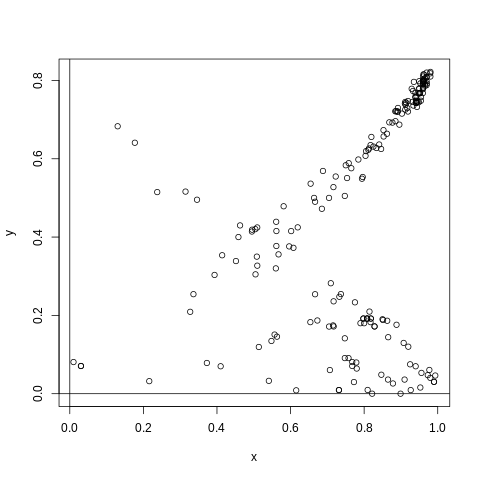

In [158]:
%%R -i x
plot(x,y)
abline(h = 0)
abline(v = 0)
quadrant_1 <- sum((x < .5) & (y < .5))
quadrant_2 <- sum((x >= 0.5) & (y < 0.5))
quadrant_3 <- sum((x < 0.5) & (y >= 0.5))
quadrant_4 <- sum((x >= 0.5) & (y >= 0.5))

In [164]:
%%R 
quadrant_3


[1] 4


and now we can use it in all the following R chunks

In [192]:
pwd

'/home/jovyan/GPLVM_Shaista'

<Figure size 432x288 with 0 Axes>

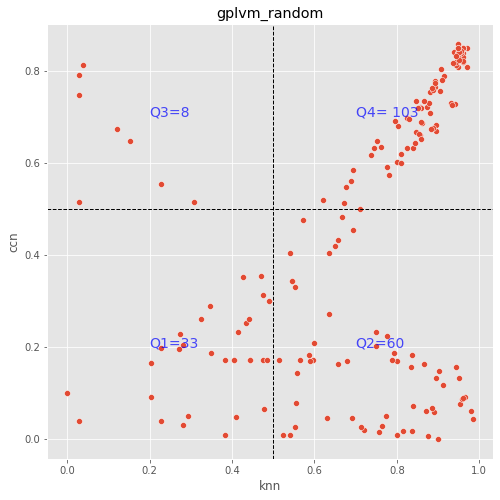

In [207]:
plt.savefig('books_read.png')
plt.figure(figsize=(8,8))

#Scatterplot
sns.scatterplot( x=subset4[0].obs["knn_purity_X_umap_gplvm_random"], y=subset4[0].obs["proliferation_purity_X_umap_gplvm_random"])

#Title 
plt.title("gplvm_random")

# x and y axis labels
plt.xlabel('knn')
plt.ylabel('ccn')


#Quadrant Marker          
plt.text(x=0.7, y=.7, s="Q4= 103",alpha=0.7,fontsize=14, color='b')
plt.text(x=.2, y=.7, s="Q3=8",alpha=0.7,fontsize=14, color='b')
plt.text(x=.7, y=.2, s="Q2=60", alpha=0.7,fontsize=14, color='b')
plt.text(x=.2, y=.2, s="Q1=33", alpha=0.7,fontsize=14, color='b')          

# Benchmark Mean values          
plt.axhline(y=0.5, color='k', linestyle='--', linewidth=1)           
plt.axvline(x=0.5, color='k',linestyle='--', linewidth=1) 
          
plt.show()
plt.close()

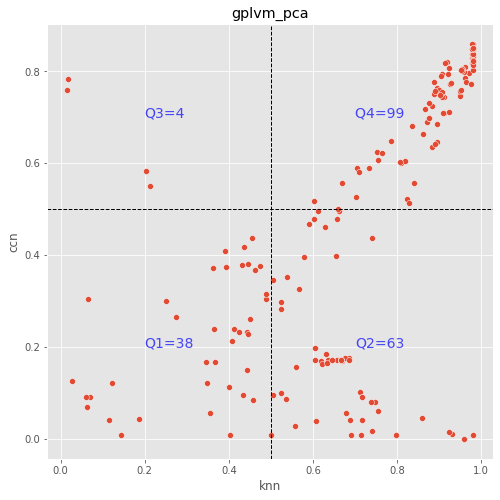

In [187]:
plt.figure(figsize=(8,8))

#Scatterplot
sns.scatterplot( x=subset4[0].obs["knn_purity_X_umap_gplvm_PC"], y=subset4[0].obs["proliferation_purity_X_umap_gplvm_PC"])

#Title 
plt.title("gplvm_pca")

# x and y axis labels
plt.xlabel('knn')
plt.ylabel('ccn')


#Quadrant Marker          
plt.text(x=0.7, y=.7, s="Q4=99 ",alpha=0.7,fontsize=14, color='b')
plt.text(x=.2, y=.7, s="Q3=4",alpha=0.7,fontsize=14, color='b')
plt.text(x=.7, y=.2, s="Q2=63", alpha=0.7,fontsize=14, color='b')
plt.text(x=.2, y=.2, s="Q1=38", alpha=0.7,fontsize=14, color='b')          

# Benchmark Mean values          
plt.axhline(y=0.5, color='k', linestyle='--', linewidth=1)           
plt.axvline(x=0.5, color='k',linestyle='--', linewidth=1) 
          
plt.show()

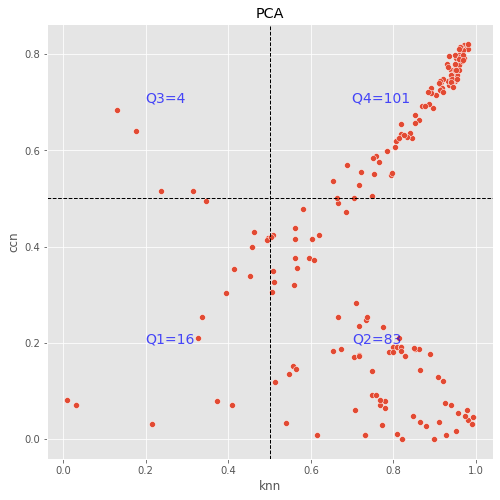

In [186]:
plt.figure(figsize=(8,8))

#Scatterplot
sns.scatterplot( x=subset4[0].obs["knn_purity_X_umap_pca"], y=subset4[0].obs["proliferation_purity_X_umap_pca"])

#Title 
plt.title("PCA")

# x and y axis labels
plt.xlabel('knn')
plt.ylabel('ccn')


#Quadrant Marker          
plt.text(x=0.7, y=.7, s="Q4=101 ",alpha=0.7,fontsize=14, color='b')
plt.text(x=.2, y=.7, s="Q3=4",alpha=0.7,fontsize=14, color='b')
plt.text(x=.7, y=.2, s="Q2=83", alpha=0.7,fontsize=14, color='b')
plt.text(x=.2, y=.2, s="Q1=16", alpha=0.7,fontsize=14, color='b')          

# Benchmark Mean values          
plt.axhline(y=0.5, color='k', linestyle='--', linewidth=1)           
plt.axvline(x=0.5, color='k',linestyle='--', linewidth=1) 
          
plt.show()

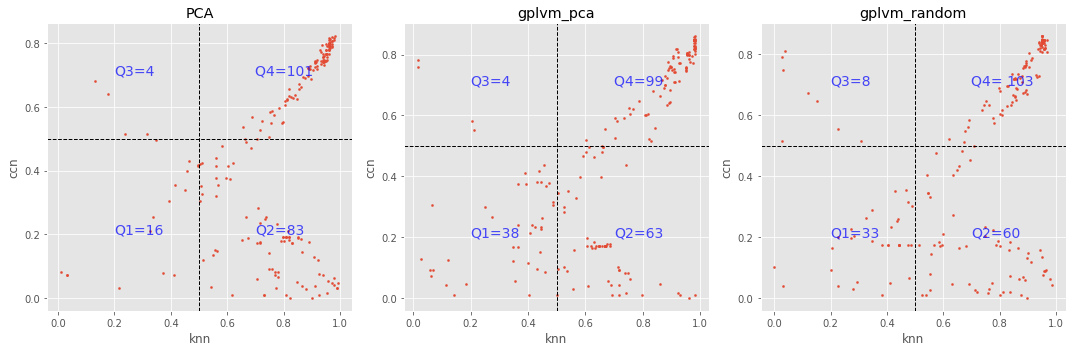

In [275]:
fig, axs = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)
axs[ 0].scatter( subset4[0].obs["knn_purity_X_umap_pca"], subset4[0].obs["proliferation_purity_X_umap_pca"], s=4)
axs[0].set_title("PCA")
axs[0].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[0].axvline(x=0.5, color='k',linestyle='--', linewidth=1) 
axs[0].text(x=0.7, y=.7, s="Q4=101 ",alpha=0.7,fontsize=14, color='b')
axs[0].text(x=.2, y=.7, s="Q3=4",alpha=0.7,fontsize=14, color='b')
axs[0].text(x=.7, y=.2, s="Q2=83", alpha=0.7,fontsize=14, color='b')
axs[0].text(x=.2, y=.2, s="Q1=16", alpha=0.7,fontsize=14, color='b')   

axs[1].scatter( subset4[0].obs["knn_purity_X_umap_gplvm_PC"],subset4[0].obs["proliferation_purity_X_umap_gplvm_PC"], s=4)
axs[1].set_title("gplvm_pca")

axs[1].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[1].axvline(x=0.5, color='k',linestyle='--', linewidth=1)       
axs[1].text(x=0.7, y=.7, s="Q4=99 ",alpha=0.7,fontsize=14, color='b')
axs[1].text(x=.2, y=.7, s="Q3=4",alpha=0.7,fontsize=14, color='b')
axs[1].text(x=.7, y=.2, s="Q2=63", alpha=0.7,fontsize=14, color='b')
axs[1].text(x=.2, y=.2, s="Q1=38", alpha=0.7,fontsize=14, color='b')   

# axs[1, 0].sharex(axs[0, 0])
axs[ 2].scatter(subset4[0].obs["knn_purity_X_umap_gplvm_random"], subset4[0].obs["proliferation_purity_X_umap_gplvm_random"], s=4)
axs[2].set_title("gplvm_random")
axs[2].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[2].axvline(x=0.5, color='k',linestyle='--', linewidth=1) 
axs[2].text(x=0.7, y=.7, s="Q4= 103",alpha=0.7,fontsize=14, color='b')
axs[2].text(x=.2, y=.7, s="Q3=8",alpha=0.7,fontsize=14, color='b')
axs[2].text(x=.7, y=.2, s="Q2=60", alpha=0.7,fontsize=14, color='b')
axs[2].text(x=.2, y=.2, s="Q1=33", alpha=0.7,fontsize=14, color='b')          

axs[0].set_xlabel('knn')
axs[0].set_ylabel('ccn')
axs[1].set_xlabel('knn')
axs[1].set_ylabel('ccn')
axs[2].set_xlabel('knn')
axs[2].set_ylabel('ccn')
fig.tight_layout()


In [360]:
x=subset4[1].obs["knn_purity_X_umap_gplvm_random"]
y=subset4[1].obs["proliferation_purity_X_umap_gplvm_random"]

In [361]:
%%R -i x,y
# plot(x,y)
# abline(h = 0)
# abline(v = 0)
quadrant_1 <- sum((x < .5) & (y < .5))
quadrant_2 <- sum((x >= 0.5) & (y < 0.5))
quadrant_3 <- sum((x < 0.5) & (y >= 0.5))
quadrant_4 <- sum((x >= 0.5) & (y >= 0.5))

In [365]:
%%R
quadrant_4

[1] 331


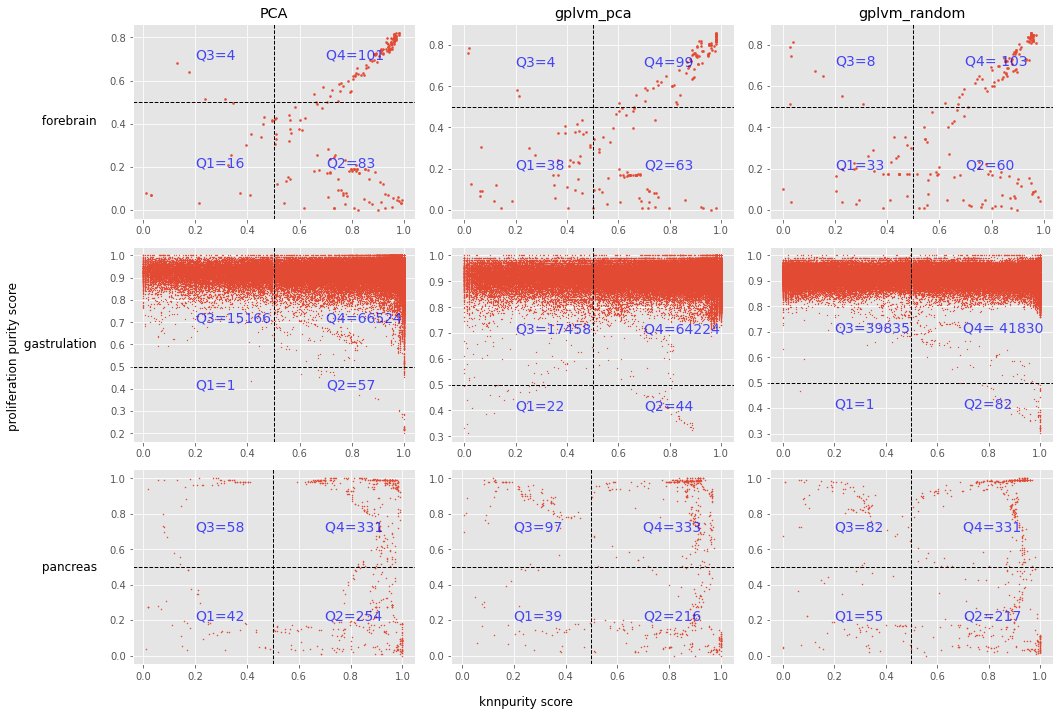

In [212]:
fig, axs = plt.subplots(3, 3)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.supxlabel('knnpurity score')
fig.supylabel('proliferation purity score')


axs[0,0].scatter( subset4[0].obs["knn_purity_X_umap_pca"], subset4[0].obs["proliferation_purity_X_umap_pca"], s=4)
axs[0,0].set_title("PCA")
axs[0,0].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[0,0].axvline(x=0.5, color='k',linestyle='--', linewidth=1) 
axs[0,0].text(x=0.7, y=.7, s="Q4=101 ",alpha=0.7,fontsize=14, color='b')
axs[0,0].text(x=.2, y=.7, s="Q3=4",alpha=0.7,fontsize=14, color='b')
axs[0,0].text(x=.7, y=.2, s="Q2=83", alpha=0.7,fontsize=14, color='b')
axs[0,0].text(x=.2, y=.2, s="Q1=16", alpha=0.7,fontsize=14, color='b')   

axs[0,1].scatter( subset4[0].obs["knn_purity_X_umap_gplvm_PC"],subset4[0].obs["proliferation_purity_X_umap_gplvm_PC"], s=4)
axs[0,1].set_title("gplvm_pca")

axs[0,1].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[0,1].axvline(x=0.5, color='k',linestyle='--', linewidth=1)       
axs[0,1].text(x=0.7, y=.7, s="Q4=99 ",alpha=0.7,fontsize=14, color='b')
axs[0,1].text(x=.2, y=.7, s="Q3=4",alpha=0.7,fontsize=14, color='b')
axs[0,1].text(x=.7, y=.2, s="Q2=63", alpha=0.7,fontsize=14, color='b')
axs[0,1].text(x=.2, y=.2, s="Q1=38", alpha=0.7,fontsize=14, color='b')   

# axs[1, 0].sharex(axs[0, 0])
axs[0, 2].scatter(subset4[0].obs["knn_purity_X_umap_gplvm_random"], subset4[0].obs["proliferation_purity_X_umap_gplvm_random"], s=4)
axs[0,2].set_title("gplvm_random")
axs[0,2].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[0,2].axvline(x=0.5, color='k',linestyle='--', linewidth=1) 
axs[0,2].text(x=0.7, y=.7, s="Q4= 103",alpha=0.7,fontsize=14, color='b')
axs[0,2].text(x=.2, y=.7, s="Q3=8",alpha=0.7,fontsize=14, color='b')
axs[0,2].text(x=.7, y=.2, s="Q2=60", alpha=0.7,fontsize=14, color='b')
axs[0,2].text(x=.2, y=.2, s="Q1=33", alpha=0.7,fontsize=14, color='b')  


# gastrulation        

axs[1,0].scatter( subset4[3].obs["knn_purity_X_umap_pca"], subset4[3].obs["proliferation_purity_X_umap_pca"], s=.7)
# axs[1,0].set_title("PCA")
axs[1,0].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[1,0].axvline(x=0.5, color='k',linestyle='--', linewidth=1) 
axs[1,0].text(x=0.7, y=.7, s="Q4=66524 ",alpha=0.7,fontsize=14, color='b')
axs[1,0].text(x=.2, y=.7, s="Q3=15166",alpha=0.7,fontsize=14, color='b')
axs[1,0].text(x=.7, y=.4, s="Q2=57", alpha=0.7,fontsize=14, color='b')
axs[1,0].text(x=.2, y=.4, s="Q1=1", alpha=0.7,fontsize=14, color='b')   


axs[1,1].scatter( subset4[3].obs["knn_purity_X_umap_gplvm_PC"],subset4[3].obs["proliferation_purity_X_umap_gplvm_PC"], s=.7)
# axs[1,1].set_title("gplvm_pca")

axs[1,1].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[1,1].axvline(x=0.5, color='k',linestyle='--', linewidth=1)       
axs[1,1].text(x=0.7, y=.7, s="Q4=64224 ",alpha=0.7,fontsize=14, color='b')
axs[1,1].text(x=.2, y=.7, s="Q3=17458",alpha=0.7,fontsize=14, color='b')
axs[1,1].text(x=.7, y=.4, s="Q2=44", alpha=0.7,fontsize=14, color='b')
axs[1,1].text(x=.2, y=.4, s="Q1=22", alpha=0.7,fontsize=14, color='b')   

axs[1, 0].sharex(axs[0, 0])
axs[0, 1].sharex(axs[1, 1])
axs[1, 2].scatter(subset4[3].obs["knn_purity_X_umap_gplvm_random"], subset4[3].obs["proliferation_purity_X_umap_gplvm_random"], s=.7)
# axs[1,2].set_title("gplvm_random")
axs[1,2].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[1,2].axvline(x=0.5, color='k',linestyle='--', linewidth=1) 
axs[1,2].text(x=0.7, y=.7, s="Q4= 41830",alpha=0.7,fontsize=14, color='b')
axs[1,2].text(x=.2, y=.7, s="Q3=39835",alpha=0.7,fontsize=14, color='b')
axs[1,2].text(x=.7, y=.4, s="Q2=82", alpha=0.7,fontsize=14, color='b')
axs[1,2].text(x=.2, y=.4, s="Q1=1", alpha=0.7,fontsize=14, color='b')  



# pancreas         

axs[2,0].scatter( subset4[1].obs["knn_purity_X_umap_pca"], subset4[1].obs["proliferation_purity_X_umap_pca"], s=1)
# axs[2,0].set_title("PCA")
axs[2,0].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[2,0].axvline(x=0.5, color='k',linestyle='--', linewidth=1) 
axs[2,0].text(x=0.7, y=.7, s="Q4=331 ",alpha=0.7,fontsize=14, color='b')
axs[2,0].text(x=.2, y=.7, s="Q3=58",alpha=0.7,fontsize=14, color='b')
axs[2,0].text(x=.7, y=.2, s="Q2=254", alpha=0.7,fontsize=14, color='b')
axs[2,0].text(x=.2, y=.2, s="Q1=42", alpha=0.7,fontsize=14, color='b')   

axs[2,1].scatter( subset4[1].obs["knn_purity_X_umap_gplvm_PC"],subset4[1].obs["proliferation_purity_X_umap_gplvm_PC"], s=1)
# axs[2,1].set_title("gplvm_pca")

axs[2,1].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[2,1].axvline(x=0.5, color='k',linestyle='--', linewidth=1)       
axs[2,1].text(x=0.7, y=.7, s="Q4=333 ",alpha=0.7,fontsize=14, color='b')
axs[2,1].text(x=.2, y=.7, s="Q3=97",alpha=0.7,fontsize=14, color='b')
axs[2,1].text(x=.7, y=.2, s="Q2=216", alpha=0.7,fontsize=14, color='b')
axs[2,1].text(x=.2, y=.2, s="Q1=39", alpha=0.7,fontsize=14, color='b')   


axs[2, 2].scatter(subset4[1].obs["knn_purity_X_umap_gplvm_random"], subset4[1].obs["proliferation_purity_X_umap_gplvm_random"], s=1)
# axs[2,2].set_title("gplvm_random")
axs[2,2].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[2,2].axvline(x=0.5, color='k',linestyle='--', linewidth=1) 
axs[2,2].text(x=0.7, y=.7, s="Q4=331 ",alpha=0.7,fontsize=14, color='b')
axs[2,2].text(x=.2, y=.7, s="Q3=82",alpha=0.7,fontsize=14, color='b')
axs[2,2].text(x=.7, y=.2, s="Q2=217", alpha=0.7,fontsize=14, color='b')
axs[2,2].text(x=.2, y=.2, s="Q1=55", alpha=0.7,fontsize=14, color='b') 

rows = [' {}'.format(row) for row in ['forebrain', 'gastrulation', 'pancreas']]



pad = 5 # in points

for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')



fig.tight_layout()


fig.savefig("KnnVsCcn_CDK1.png")

In [183]:
x=subset2[1].obs["knn_purity_X_umap_pca"]
y=subset2[1].obs["proliferation_purity_X_umap_pca"]

In [203]:
x=subset2[1].obs["knn_purity_X_umap_gplvm_PC"]
y=subset2[1].obs["proliferation_purity_X_umap_gplvm_PC"]

In [207]:
x=subset2[1].obs["knn_purity_X_umap_gplvm_random"]
y=subset2[1].obs["proliferation_purity_X_umap_gplvm_random"]

In [208]:
%%R -i x,y
# plot(x,y)
# abline(h = 0)
# abline(v = 0)
quadrant_1 <- sum((x < .5) & (y < .5))
quadrant_2 <- sum((x >= 0.5) & (y < 0.5))
quadrant_3 <- sum((x < 0.5) & (y >= 0.5))
quadrant_4 <- sum((x >= 0.5) & (y >= 0.5))

In [209]:
%%R
quadrant_2

[1] 109


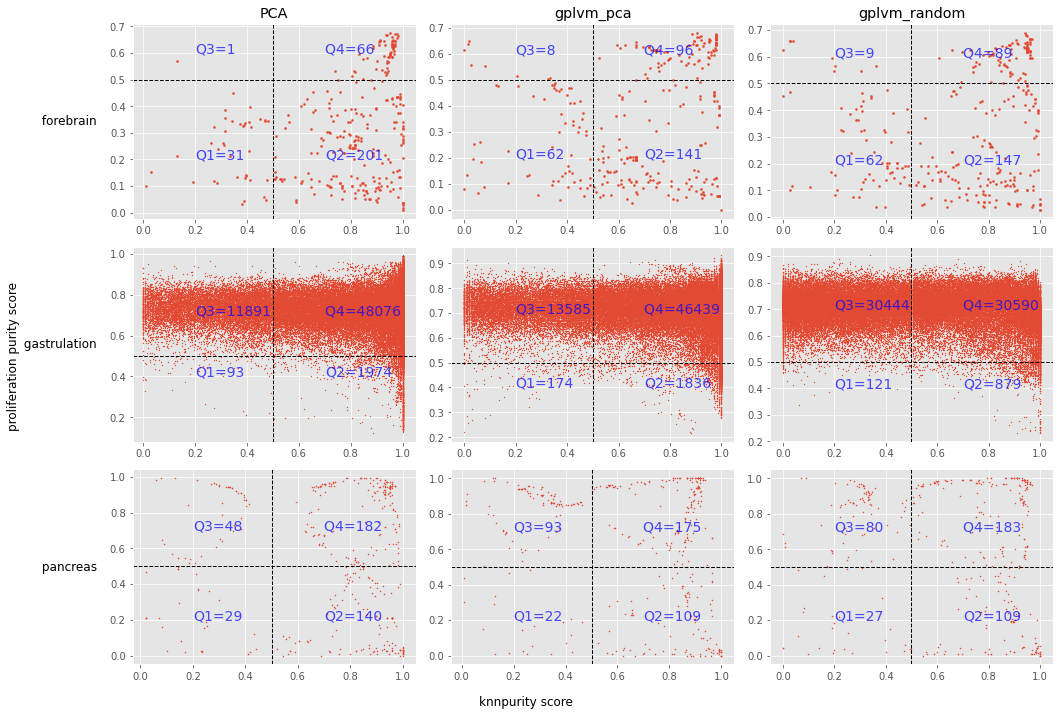

In [21]:
# Gene: CENPF
fig, axs = plt.subplots(3, 3)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.supxlabel('knnpurity score')
fig.supylabel('proliferation purity score')

# Forebrain
axs[0,0].scatter( subset2[0].obs["knn_purity_X_umap_pca"], subset2[0].obs["proliferation_purity_X_umap_pca"], s=4)
axs[0,0].set_title("PCA")
axs[0,0].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[0,0].axvline(x=0.5, color='k',linestyle='--', linewidth=1) 
axs[0,0].text(x=0.7, y=.6, s="Q4=66 ",alpha=0.7,fontsize=14, color='b')
axs[0,0].text(x=.2, y=.6, s="Q3=1",alpha=0.7,fontsize=14, color='b')
axs[0,0].text(x=.7, y=.2, s="Q2=201", alpha=0.7,fontsize=14, color='b')
axs[0,0].text(x=.2, y=.2, s="Q1=31", alpha=0.7,fontsize=14, color='b')   

axs[0,1].scatter( subset2[0].obs["knn_purity_X_umap_gplvm_PC"],subset2[0].obs["proliferation_purity_X_umap_gplvm_PC"], s=4)
axs[0,1].set_title("gplvm_pca")

axs[0,1].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[0,1].axvline(x=0.5, color='k',linestyle='--', linewidth=1)       
axs[0,1].text(x=0.7, y=.6, s="Q4=96 ",alpha=0.7,fontsize=14, color='b')
axs[0,1].text(x=.2, y=.6, s="Q3=8",alpha=0.7,fontsize=14, color='b')
axs[0,1].text(x=.7, y=.2, s="Q2=141", alpha=0.7,fontsize=14, color='b')
axs[0,1].text(x=.2, y=.2, s="Q1=62", alpha=0.7,fontsize=14, color='b')   

# axs[1, 0].sharex(axs[0, 0])
axs[0, 2].scatter(subset2[0].obs["knn_purity_X_umap_gplvm_random"], subset2[0].obs["proliferation_purity_X_umap_gplvm_random"], s=4)
axs[0,2].set_title("gplvm_random")
axs[0,2].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[0,2].axvline(x=0.5, color='k',linestyle='--', linewidth=1) 
axs[0,2].text(x=0.7, y=.6, s="Q4=89 ",alpha=0.7,fontsize=14, color='b')
axs[0,2].text(x=.2, y=.6, s="Q3=9",alpha=0.7,fontsize=14, color='b')
axs[0,2].text(x=.7, y=.2, s="Q2=147", alpha=0.7,fontsize=14, color='b')
axs[0,2].text(x=.2, y=.2, s="Q1=62", alpha=0.7,fontsize=14, color='b')  


# gastrulation        

axs[1,0].scatter( subset2[3].obs["knn_purity_X_umap_pca"], subset2[3].obs["proliferation_purity_X_umap_pca"], s=.7)
# axs[1,0].set_title("PCA")
axs[1,0].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[1,0].axvline(x=0.5, color='k',linestyle='--', linewidth=1) 
axs[1,0].text(x=0.7, y=.7, s="Q4=48076 ",alpha=0.7,fontsize=14, color='b')
axs[1,0].text(x=.2, y=.7, s="Q3=11891",alpha=0.7,fontsize=14, color='b')
axs[1,0].text(x=.7, y=.4, s="Q2=1974", alpha=0.7,fontsize=14, color='b')
axs[1,0].text(x=.2, y=.4, s="Q1=93", alpha=0.7,fontsize=14, color='b')   


axs[1,1].scatter( subset2[3].obs["knn_purity_X_umap_gplvm_PC"],subset2[3].obs["proliferation_purity_X_umap_gplvm_PC"], s=.7)
# axs[1,1].set_title("gplvm_pca")

axs[1,1].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[1,1].axvline(x=0.5, color='k',linestyle='--', linewidth=1)       
axs[1,1].text(x=0.7, y=.7, s="Q4=46439 ",alpha=0.7,fontsize=14, color='b')
axs[1,1].text(x=.2, y=.7, s="Q3=13585",alpha=0.7,fontsize=14, color='b')
axs[1,1].text(x=.7, y=.4, s="Q2=1836", alpha=0.7,fontsize=14, color='b')
axs[1,1].text(x=.2, y=.4, s="Q1=174", alpha=0.7,fontsize=14, color='b')   

axs[1, 0].sharex(axs[0, 0])
axs[0, 1].sharex(axs[1, 1])
axs[1, 2].scatter(subset2[3].obs["knn_purity_X_umap_gplvm_random"], subset2[3].obs["proliferation_purity_X_umap_gplvm_random"], s=.7)
# axs[1,2].set_title("gplvm_random")
axs[1,2].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[1,2].axvline(x=0.5, color='k',linestyle='--', linewidth=1) 
axs[1,2].text(x=0.7, y=.7, s="Q4=30590 ",alpha=0.7,fontsize=14, color='b')
axs[1,2].text(x=.2, y=.7, s="Q3=30444",alpha=0.7,fontsize=14, color='b')
axs[1,2].text(x=.7, y=.4, s="Q2=879", alpha=0.7,fontsize=14, color='b')
axs[1,2].text(x=.2, y=.4, s="Q1=121", alpha=0.7,fontsize=14, color='b')  



# pancreas         

axs[2,0].scatter( subset2[1].obs["knn_purity_X_umap_pca"], subset2[1].obs["proliferation_purity_X_umap_pca"], s=1)
# axs[2,0].set_title("PCA")
axs[2,0].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[2,0].axvline(x=0.5, color='k',linestyle='--', linewidth=1) 
axs[2,0].text(x=0.7, y=.7, s="Q4=182 ",alpha=0.7,fontsize=14, color='b')
axs[2,0].text(x=.2, y=.7, s="Q3=48",alpha=0.7,fontsize=14, color='b')
axs[2,0].text(x=.7, y=.2, s="Q2=140", alpha=0.7,fontsize=14, color='b')
axs[2,0].text(x=.2, y=.2, s="Q1=29", alpha=0.7,fontsize=14, color='b')   

axs[2,1].scatter( subset2[1].obs["knn_purity_X_umap_gplvm_PC"],subset2[1].obs["proliferation_purity_X_umap_gplvm_PC"], s=1)
# axs[2,1].set_title("gplvm_pca")

axs[2,1].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[2,1].axvline(x=0.5, color='k',linestyle='--', linewidth=1)       
axs[2,1].text(x=0.7, y=.7, s="Q4=175 ",alpha=0.7,fontsize=14, color='b')
axs[2,1].text(x=.2, y=.7, s="Q3=93",alpha=0.7,fontsize=14, color='b')
axs[2,1].text(x=.7, y=.2, s="Q2=109", alpha=0.7,fontsize=14, color='b')
axs[2,1].text(x=.2, y=.2, s="Q1=22", alpha=0.7,fontsize=14, color='b')   


axs[2, 2].scatter(subset2[1].obs["knn_purity_X_umap_gplvm_random"], subset2[1].obs["proliferation_purity_X_umap_gplvm_random"], s=1)
# axs[2,2].set_title("gplvm_random")
axs[2,2].axhline(y=0.5, color='k', linestyle='--', linewidth=1)
axs[2,2].axvline(x=0.5, color='k',linestyle='--', linewidth=1) 
axs[2,2].text(x=0.7, y=.7, s="Q4=183 ",alpha=0.7,fontsize=14, color='b')
axs[2,2].text(x=.2, y=.7, s="Q3=80",alpha=0.7,fontsize=14, color='b')
axs[2,2].text(x=.7, y=.2, s="Q2=109", alpha=0.7,fontsize=14, color='b')
axs[2,2].text(x=.2, y=.2, s="Q1=27", alpha=0.7,fontsize=14, color='b')  



# cols = ['Column {}'.format(col) for col in range(1, 4)]
# rows = ['Row {}'.format(row) for row in ['Forebrain', 'Gastrulation', 'pancreas']]



# for ax, row in zip(axs[:,0], rows):
#     ax.set_ylabel(row, rotation=0, size='large')




rows = [' {}'.format(row) for row in ['forebrain', 'gastrulation', 'pancreas']]



pad = 5 # in points

for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
fig.tight_layout()

fig.savefig("KnnVsCcn_CENPF.png")

In [177]:
from matplotlib.transforms import offset_copy



In [ ]:
from matplotlib.transforms import offset_copy



rows = ['Row {}'.format(row) for row in ['forebrain', 'gastrulation', 'pancreas']]

# fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8))
plt.setp(axs.flat, xlabel='X-label', ylabel='Y-label')

pad = 5 # in points

for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

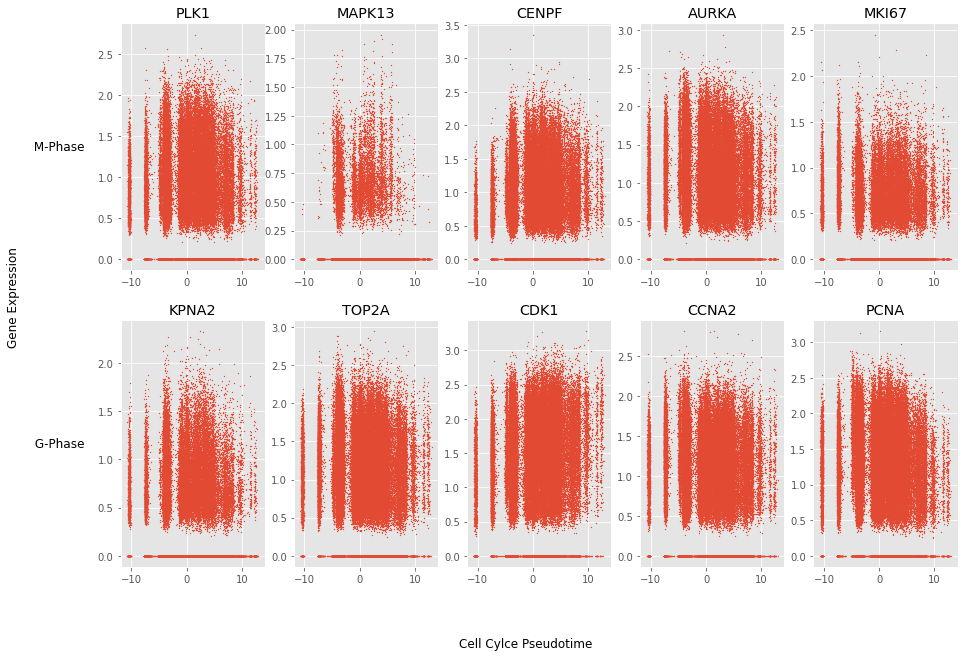

In [215]:
fig, axs = plt.subplots(2, 5)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.supxlabel('Cell Cylce Pseudotime')
fig.supylabel('Gene Expression')


axs[0,0].scatter(gastrulation2.obs['cellcycle_pseudotime'],gastrulation2[:,["PLK1"]].to_df(), s=.7 )
axs[0,0].set_title("PLK1")  

axs[0,1].scatter( gastrulation2.obs['cellcycle_pseudotime'],gastrulation2[:,["MAPK13"]].to_df(), s=.7 )
axs[0,1].set_title("MAPK13")

# axs[1, 0].sharex(axs[0, 0])
axs[0, 2].scatter(gastrulation2.obs['cellcycle_pseudotime'],gastrulation2[:,["CENPF"]].to_df(), s=.7 )
axs[0,2].set_title("CENPF")


# axs[1, 0].sharex(axs[0, 0])
axs[0, 4].scatter(gastrulation2.obs['cellcycle_pseudotime'],gastrulation2[:,["MKI67"]].to_df(), s=.7 )
axs[0,4].set_title("MKI67")


axs[0, 3].scatter(gastrulation2.obs['cellcycle_pseudotime'],gastrulation2[:,["AURKA"]].to_df(), s=.7 )
axs[0,3].set_title("AURKA")
# gastrulation        

axs[1,0].scatter( gastrulation2.obs['cellcycle_pseudotime'],gastrulation2[:,["KPNA2"]].to_df(), s=.7 )
axs[1,0].set_title("KPNA2")


axs[1,1].scatter( gastrulation2.obs['cellcycle_pseudotime'],gastrulation2[:,["CKS2"]].to_df(), s=.7 )
axs[1,1].set_title("TOP2A")

axs[1, 2].scatter(gastrulation2.obs['cellcycle_pseudotime'],gastrulation2[:,["CDK1"]].to_df(), s=.7 )
axs[1,2].set_title("CDK1")


axs[1, 3].scatter(gastrulation2.obs['cellcycle_pseudotime'],gastrulation2[:,["CCNA2"]].to_df(), s=.7 )
axs[1,3].set_title("CCNA2")

axs[1, 4].scatter(gastrulation2.obs['cellcycle_pseudotime'],gastrulation2[:,["PCNA"]].to_df(), s=.7 )
axs[1,4].set_title("PCNA")

rows = [' {}'.format(row) for row in ['M-Phase', 'G-Phase']]



pad = 5 # in points

for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
    
fig.savefig("CellCycleVsGeneExpression.png")

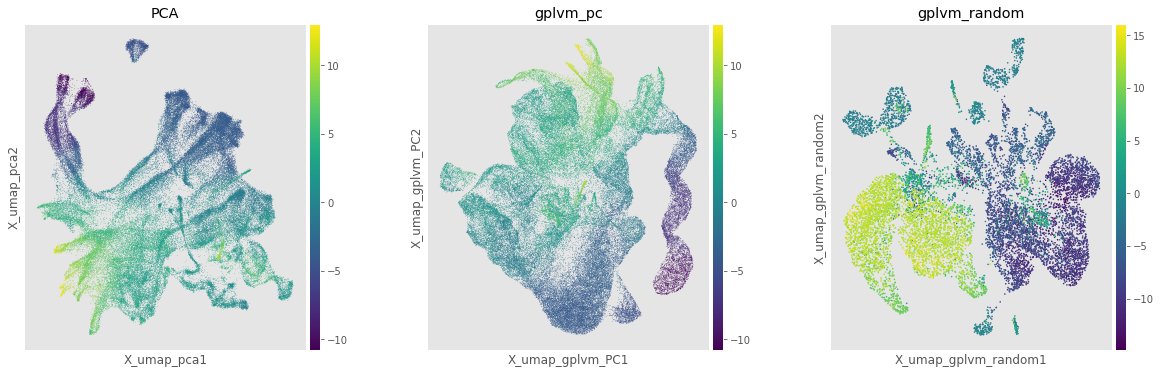

In [224]:
import matplotlib.pyplot as plt

fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6), gridspec_kw={'wspace':0.3})

ax1_dict =sc.pl.embedding(gastrulation, "X_umap_pca", legend_loc=None,color=[ 'cellcycle_pseudotime'], title= "PCA", ax=ax1, show=False)
ax2_dict = sc.pl.embedding(gastrulation, "X_umap_gplvm_PC", legend_loc=None,color=[ 'cellcycle_pseudotime'],  title= "gplvm_pc",ax=ax2, show=False)
ax3_dict = sc.pl.embedding(pbmc10k, "X_umap_gplvm_random", legend_loc=None, color=[ 'cellcycle_pseudotime'], title= "gplvm_random",  ax=ax3, show=False)


# ax1_dict =sc.pl.embedding(pbmc10k, "X_umap_pca", color=[ 'predicted.celltype.l2'], title= "PCA", ax=ax1, show=False)
# ax2_dict = sc.pl.embedding(pbmc10k, "X_umap_gplvm_PC",color=[ 'predicted.celltype.l2'],  title= "gplvm_pc",ax=ax2, show=False)
# ax3_dict2 = sc.pl.embedding(pbmc10k, "X_umap_gplvm_random", color=[ 'predicted.celltype.l2'], title= "gplvm_random",  ax=ax3, show=False)

# handles, labels = ax3_dict2.get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower right')
# fig.savefig("UMAPs.png")

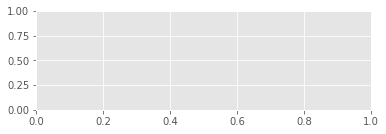

In [228]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 1)
ax1 = plt.subplot(gs[0])
# ax2 = plt.subplot(gs[0,1])
# ax3 = plt.subplot(gs[0, 3])
# ax1=sc.pl.embedding(gastrulation, "X_umap_pca", legend_loc=None,color=[ 'cellcycle_pseudotime'], title= "PCA", ax=ax1, show=False)

# ax2= sc.pl.embedding(gastrulation, "X_umap_gplvm_PC", legend_loc=None,color=[ 'cellcycle_pseudotime'],  title= "gplvm_pc",ax=ax2, show=False)
# ax3 = sc.pl.embedding(pbmc10k, "X_umap_gplvm_random", legend_loc=None, color=[ 'cellcycle_pseudotime'], title= "gplvm_random",  ax=ax3, show=False)

ax1= fig2


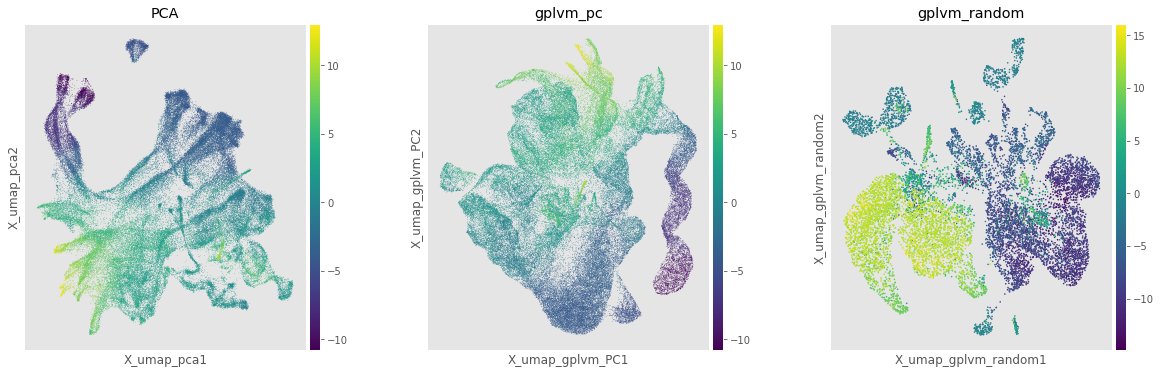

Text(0.5, 1.0, 'PCNA')

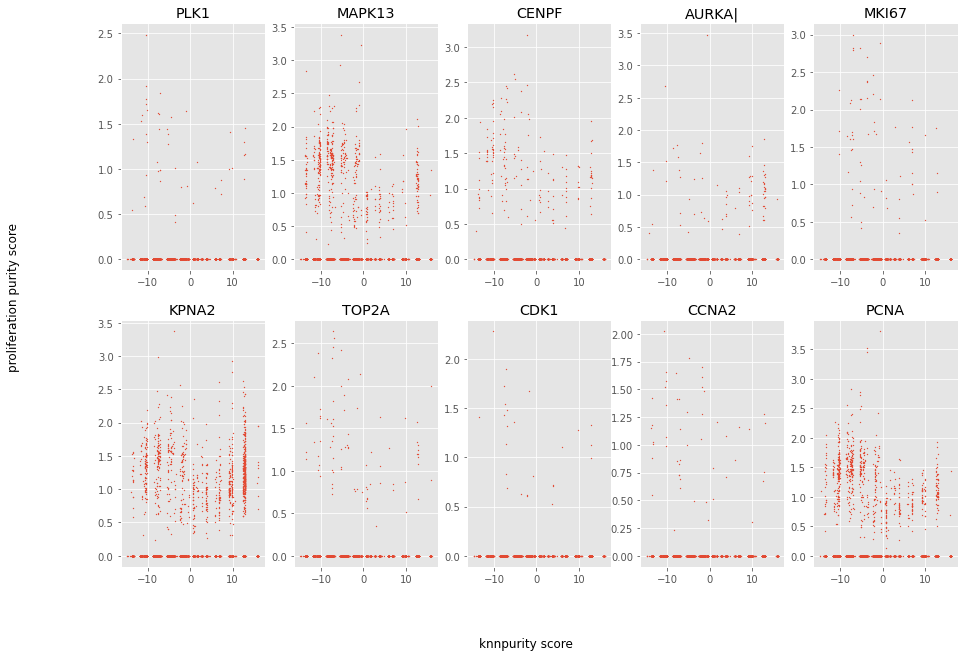

In [49]:
fig, axs = plt.subplots(2, 5)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.supxlabel('knnpurity score')
fig.supylabel('proliferation purity score')


axs[0,0].scatter(pbmc10k2.obs['cellcycle_pseudotime'],pbmc10k2[:,["PLK1"]].to_df(), s=.7 )
axs[0,0].set_title("PLK1")  

axs[0,1].scatter( pbmc10k2.obs['cellcycle_pseudotime'],pbmc10k2[:,["MAPK13"]].to_df(), s=.7 )
axs[0,1].set_title("MAPK13")

# axs[1, 0].sharex(axs[0, 0])
axs[0, 2].scatter(pbmc10k2.obs['cellcycle_pseudotime'],pbmc10k2[:,["CENPF"]].to_df(), s=.7 )
axs[0,2].set_title("CENPF")


# axs[1, 0].sharex(axs[0, 0])
axs[0, 4].scatter(pbmc10k2.obs['cellcycle_pseudotime'],pbmc10k2[:,["MKI67"]].to_df(), s=.7 )
axs[0,4].set_title("MKI67")


axs[0, 3].scatter(pbmc10k2.obs['cellcycle_pseudotime'],pbmc10k2[:,["AURKA"]].to_df(), s=.7 )
axs[0,3].set_title("AURKA|")
# gastrulation        

axs[1,0].scatter( pbmc10k2.obs['cellcycle_pseudotime'],pbmc10k2[:,["KPNA2"]].to_df(), s=.7 )
axs[1,0].set_title("KPNA2")


axs[1,1].scatter( pbmc10k2.obs['cellcycle_pseudotime'],pbmc10k2[:,["TOP2A"]].to_df(), s=.7 )
axs[1,1].set_title("TOP2A")

axs[1, 2].scatter(pbmc10k2.obs['cellcycle_pseudotime'],pbmc10k2[:,["CDK1"]].to_df(), s=.7 )
axs[1,2].set_title("CDK1")


axs[1, 3].scatter(pbmc10k2.obs['cellcycle_pseudotime'],pbmc10k2[:,["CCNA2"]].to_df(), s=.7 )
axs[1,3].set_title("CCNA2")

axs[1, 4].scatter(pbmc10k2.obs['cellcycle_pseudotime'],pbmc10k2[:,["PCNA"]].to_df(), s=.7 )
axs[1,4].set_title("PCNA")

In [60]:
pbmc10k2[:,["TOP2A"]].to_df()

,TOP2A
AAACAGCCAAAGCCTC-1,0.000000
AAACAGCCAGAATGAC-1,0.000000
AAACAGCCAGCTACGT-1,0.000000
AAACAGCCAGGCCTTG-1,0.000000
AAACAGCCATAAGGAC-1,0.000000
...,...
TTTGTGTTCTAGCTAA-1,2.105963
TTTGTTGGTACGCGCA-1,0.000000
TTTGTTGGTATTTGCC-1,0.000000
TTTGTTGGTGATTACG-1,0.000000


In [338]:
x=subset4[4].obs["knn_purity_X_umap_pca"]
y=subset4[4].obs["proliferation_purity_X_umap_pca"]

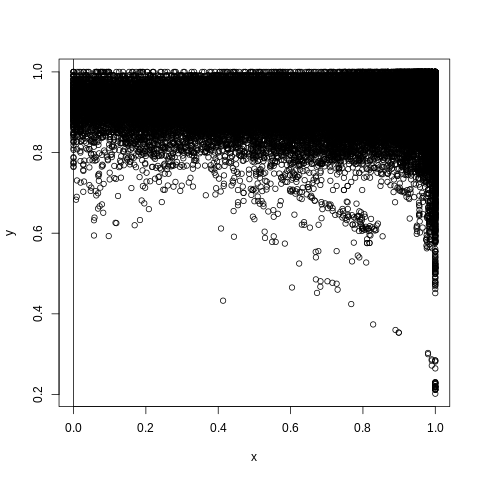

In [326]:
%%R -i x,y
plot(x,y)
abline(h = 0)
abline(v = 0)
quadrant_1 <- sum((x < .5) & (y < .5))
quadrant_2 <- sum((x >= 0.5) & (y < 0.5))
quadrant_3 <- sum((x < 0.5) & (y >= 0.5))
quadrant_4 <- sum((x >= 0.5) & (y >= 0.5))

In [329]:
%%R
quadrant_4

[1] 66524


In [269]:
fig.savefig('foo.png')


In [381]:
%%R -i Final
cc_plot=ggplot(
  data =Final,
  mapping = aes(x = as.factor(condition), y = score, fill = dataset)) +
  geom_boxplot(outlier.shape = NA) +
      theme_classic() + 
    scale_x_discrete(limits = levels(knnpurity_data$dataset)) +
      ylab("KNN purity") +
    xlab("Assay Used")



Error in levels(knnpurity_data$dataset) : 
  object 'knnpurity_data' not found


RInterpreterError: Failed to parse and evaluate line 'cc_plot=ggplot(\n  data =Final,\n  mapping = aes(x = as.factor(condition), y = score, fill = dataset)) +\n  geom_boxplot(outlier.shape = NA) +\n      theme_classic() + \n    scale_x_discrete(limits = levels(knnpurity_data$dataset)) +\n      ylab("KNN purity") +\n    xlab("Assay Used")\n'.
R error message: "Error in levels(knnpurity_data$dataset) : \n  object 'knnpurity_data' not found"

In [21]:
knnpurity_data.to_csv('/home/jupyter/GPLVM_Shaista/knnPurity.csv')

In [87]:
pwd

'/home/jovyan'

In [92]:
df = pd.read_csv ('/home/jovyan/GPLVM_Shaista/ARI_NMI.csv')


In [142]:
RandScore=df[df["Metric"] == "ARI"]

In [197]:
NMI=df[df["Metric"] == "NMI"]

In [198]:
NMI

,Unnamed: 0,condition,score,dataset,Metric
18,0,NMI_random_init,0.559229,gastrulation,NMI
19,1,NMI_gplvm_init,0.755076,gastrulation,NMI
20,2,NMI_pca,0.694095,gastrulation,NMI
21,0,NMI_random_init,0.533229,bonemarrow,NMI
22,1,NMI_gplvm_init,0.537350,bonemarrow,NMI
23,2,NMI_pca,0.631125,bonemarrow,NMI
24,0,NMI_random_init,0.632026,forebrain,NMI
25,1,NMI_gplvm_init,0.567295,forebrain,NMI
26,2,NMI_pca,0.683863,forebrain,NMI
27,0,NMI_random_init,0.580684,pancreas,NMI


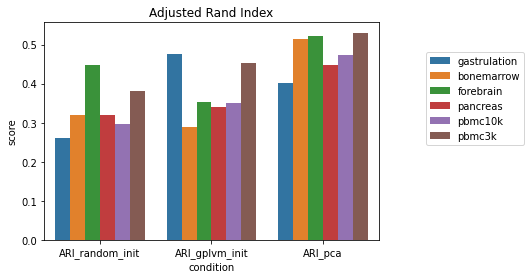

In [199]:
ax = sns.barplot(x="condition", y="score", hue="dataset",
                 data=RandScore, linewidth=2.5)
#plt.legend(loc='upper left')
plt.title("Adjusted Rand Index")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=3.)


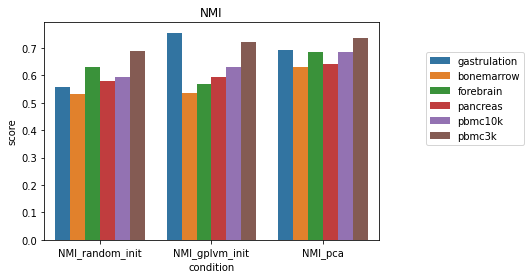

In [200]:
nmi = sns.barplot(x="condition", y="score", hue="dataset",
                 data=NMI, linewidth=2.5)
#plt.legend(loc='upper left')
plt.title("NMI")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=3.)

In [201]:
%%R -i RandScore
str(RandScore)

'data.frame':	18 obs. of  5 variables:
 $ Unnamed: 0: int  0 1 2 0 1 2 0 1 2 0 ...
 $ condition : chr  "ARI_random_init" "ARI_gplvm_init" "ARI_pca" "ARI_random_init" ...
 $ score     : num  0.261 0.476 0.401 0.32 0.29 ...
 $ dataset   : chr  "gastrulation" "gastrulation" "gastrulation" "bonemarrow" ...
 $ Metric    : chr  "ARI" "ARI" "ARI" "ARI" ...


In [203]:
%%R -i NMI
str(NMI)

'data.frame':	18 obs. of  5 variables:
 $ Unnamed: 0: int  0 1 2 0 1 2 0 1 2 0 ...
 $ condition : chr  "NMI_random_init" "NMI_gplvm_init" "NMI_pca" "NMI_random_init" ...
 $ score     : num  0.559 0.755 0.694 0.533 0.537 ...
 $ dataset   : chr  "gastrulation" "gastrulation" "gastrulation" "bonemarrow" ...
 $ Metric    : chr  "NMI" "NMI" "NMI" "NMI" ...


In [204]:
%%R 

  p1=ggplot(RandScore, aes(condition,score, fill=dataset))+
  geom_col(position="dodge") +
  labs(title="Adjusted Rand Score",
        x="Condition", y= "Score")
     p2=ggplot(NMI, aes(condition,score, fill=dataset))+
  geom_col(position="dodge") +
  labs(title="NMI",
        x="Condition", y= "Score")

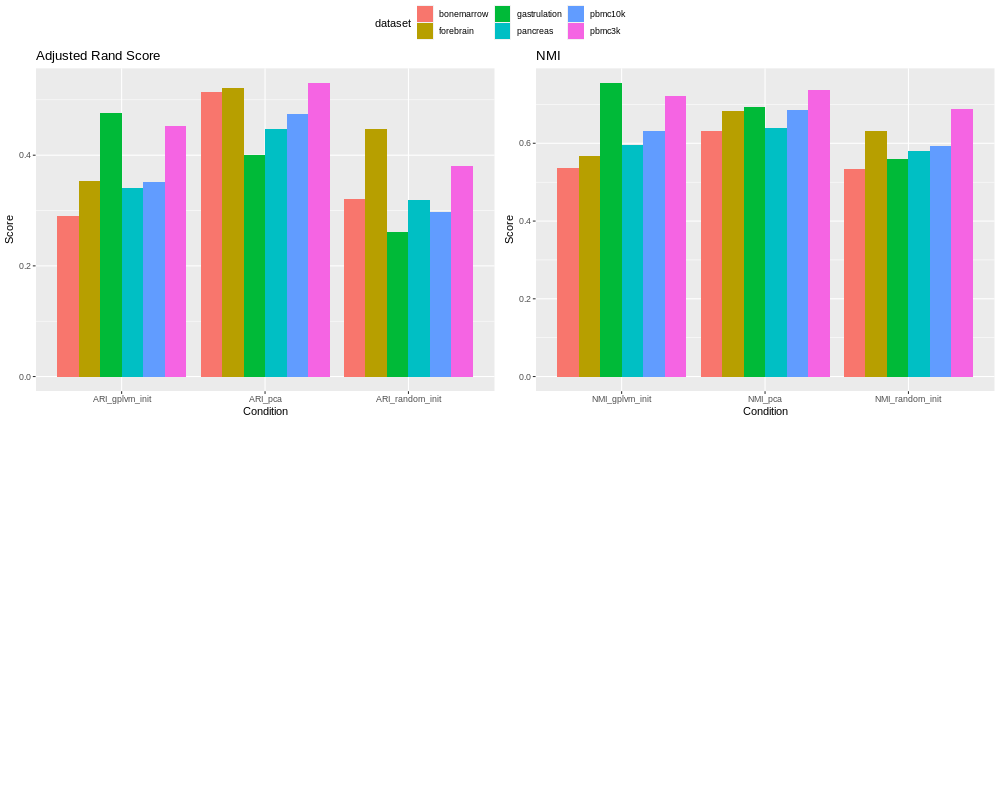

In [226]:
%%R -w 1000 -h 800
library(ggpubr)
NMI_ARIPlot=ggarrange(p1, p2, ncol=2, nrow=2, common.legend = TRUE, legend="top")
NMI_ARIPlot+scale_color_brewer(palette="Dark2")

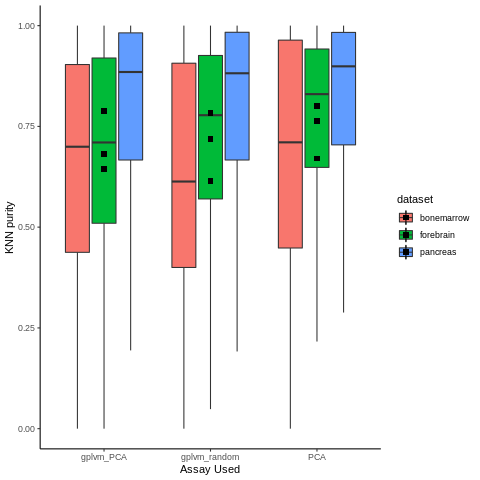

In [227]:
%%R
knn_plot+scale_color_brewer(palette="Dark2")

In [245]:
%%R 
library(ggpubr)
 S=ggarrange(NMI_ARIPlot, knn_plot, 
           labels = c("A", "B"),
             
           ncol = 1, nrow = 2, heights = c(3,1))

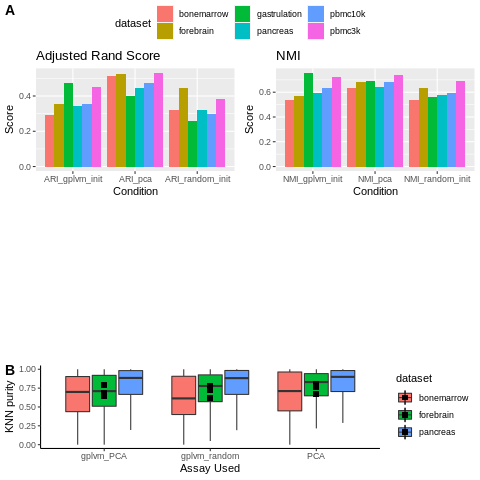

In [264]:
%%R 
S

In [18]:
pancreas

AnnData object with n_obs × n_vars = 3696 × 1939
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'cellcycle_pseudotime', 'clusters_gplvm_PcaInit', 'clusters_PC', 'clusters_gplvm_randomInit', 'celltype', 'knn_purity_X_umap_pca', 'knn_purity_X_umap_gplvm_random', 'knn_purity_X_umap_gplvm_PC', 'CENPF', 'proliferation_purity_X_umap_pca', 'proliferation_purity_X_umap_gplvm_PC', 'proliferation_purity_X_umap_gplvm_random'
    var: 'highly_variable_genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'PCA', 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'gplvm_PCA', 'hvg', 'knnpurity', 'leiden', 'likelihood_state_dict', 'model_state_dict', 'neighbors', 'pca', 'umap', 'prolif_purity'
    obsm: 'X_BGPLVM_latent', 'X_pca', 'X_umap', 'X_umap_gplvm_PC', 'X_umap_gplvm_random', 'X_umap_pca'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'
    obsp: 'PCA_connectivities', 'PCA_distances', 'connectivities', 'distances', 'gplvm_PCA_connectivities', 

... storing 'CENPF' as categorical


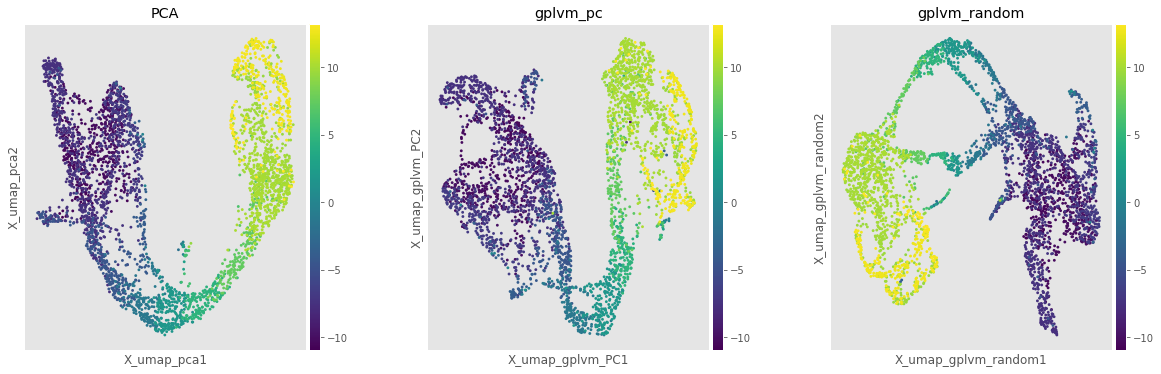

In [19]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6), gridspec_kw={'wspace':0.3})

ax1_dict =sc.pl.embedding(pancreas, "X_umap_pca", legend_loc=None,color=[  "cellcycle_pseudotime"], title= "PCA", ax=ax1, show=False)
ax2_dict = sc.pl.embedding(pancreas, "X_umap_gplvm_PC", legend_loc=None,color=[ "cellcycle_pseudotime"],  title= "gplvm_pc",ax=ax2, show=False)
ax3_dict = sc.pl.embedding(pancreas, "X_umap_gplvm_random", legend_loc=None, color=[ "cellcycle_pseudotime"], title= "gplvm_random",  ax=ax3, show=False)


# ax1_dict =sc.pl.embedding(pbmc10k, "X_umap_pca", color=[ 'predicted.celltype.l2'], title= "PCA", ax=ax1, show=False)
# ax2_dict = sc.pl.embedding(pbmc10k, "X_umap_gplvm_PC",color=[ 'predicted.celltype.l2'],  title= "gplvm_pc",ax=ax2, show=False)
# ax3_dict2 = sc.pl.embedding(pbmc10k, "X_umap_gplvm_random", color=[ 'predicted.celltype.l2'], title= "gplvm_random",  ax=ax3, show=False)

# handles, labels = ax3_dict2.get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower right')
fig.savefig("Pseudotime_Expression.png")